# Lending Club Case Study - Analysis to Identify Borrower is Defaulted or not

## Problem Statement 

>A Consumer finance company, specialises in lending various types of loans to urban customers (personal loans, business loans and financing of medical procedures), want's to build a risk analytics process of evaluating a borrower's ability to repay the loan and determine the likelihood of default.

## Business Understanding

>A Consumer finance company, when receives a loan application, has to make a decision for loan approval based on the applicant’s profile. As part of risk mitigation, company want's to reduce the business and financial or Credit loss. During evaluating a loan application there are two **types of risks** associated with the bank’s decision:
> 1. If the applicant is **likely to repay the loan**, then not approving the loan results in a **loss of business** to the company.
> 2. If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company.

## Business Objective

> 1. Company's decision making in loan approval process is backed with strong analytics data, which helps to take a right decision for loan sanction.
> 2. Company's loan approval time can be reduced, which improves profitability and business growth.
> 3. Company can mitigate the credit loss with help of risk analytics, by identifying the borrowers capability of loan repayment and rejecting the loan application.
> 4. Company can mitigate the business loss with help of risk analytics, by not rejecting a loan to a customer whose loan repayment status  and credit score is very good or exceptional.
> 5. Company can take a decision on interest rate provided to customers based on the risk appetite i.e sanction a loan with high interest rate to a customer with average credit score  and low interest rate to a customer with exceptional credit score.

## DataSet Understanding

>Data given contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
>Data contains consumer and loan attributes, which helps to take a decision of loan approval.There are **two types of decisions** that could be taken by the company using the risk analytics process.
>  1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:
>      * **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)
>      * **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
>      * **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan
>  2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## DataSet Attributes
>* The Loan.csv file has 39717 records.
>* There are a total of 111 columns.
>* The columns can be broadly be classified as follows.

>* **Data Classification:**
     1. **Identifier** - `Id, member_id`
     2. **Loan Details** - `loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, issue_d`
     3. **Person Details** - `emp_title, emp_length, home_ownership, annual_inc, url, zip_code, addr_state, application_type`
     4. **Control Details** - `verification_status, pymnt_plan, policy_code`
     5. **Financial Details** - `desc, purpose, title, dti, delinq_2yrs, earliest_cr_line,  inq_last_6mths, mths_since_last_delinq, mths_since_last_record,open_acc,  pub_rec, revol_bal,revol_util, total_acc, initial_list_status, pub_rec_bankruptcies` 
     6. **Recovery Details** -  `out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int,
                                total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d` 
     7. **Does not contain Data** - `**59 columns which do not contain any data can be dropped from the analysis - **
                                     collections_12_mths_ex_med, mths_since_last_major_derog, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal,open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m,    open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths,avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl,mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq,mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq, percent_bc_gt_75, tax_liens, tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit`
>    8. **Output Details** - `loan_status`

## Data Handling and Cleaning

#### 1. Import Python Libraries
>Import all libraries required for our analysis, such as those for data loading, statistical analysis, visualizations, data transformations, and merging and joining.
>1. Pandas and Numpy have been used for Data Manipulation and numerical Calculations
>2. Matplotlib and Seaborn have been used for Data visualizations.

In [63]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

#### 2. Load loan CSV data

In [64]:
loan_data = pd.read_csv("loan.csv")

In [65]:
# Check the shape of the dataframe
loan_data.shape

(39717, 111)

In [66]:
#Read the data
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

#### 3. Analyze DataSet

In [67]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [68]:
loan_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [69]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

##### 3.1 Missing Value Treatment
> 1. Check for Null values in columns.
> 2. Drop the columns whose entire dataset is NULL.

In [70]:
#Analyse the number of null values in the columns
loan_data.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [71]:
#calculate the percentage of missing values in each column
each_column_with_null_perc = (loan_data.isnull().sum()/(len(loan_data)))*100
each_column_with_null_perc.sort_values(ascending=False)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [72]:
#calculate the percentage of dropped columns in dataset
columns_with_null_perc = loan_data.isnull().all().mean() * 100
print(f'Percentage of dropped columns = {round(columns_with_null_perc, 2)}%')

Percentage of dropped columns = 48.65%


In [73]:
# Columns with 100% null values
column_names_with_null = loan_data.columns[loan_data.isnull().all()]
column_names_with_null

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [74]:
# Drop the rows having null values in the dataset
loan_data.dropna(how='all', axis=1, inplace=True)
loan_data.shape

(39717, 57)

In [75]:
# Columns names after dropping the rows with null values
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [76]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [77]:
# Check for NULL values in filtered dataset.
loan_data.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12942
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

In [78]:
# Calculate the NULL value percentage in filtered dataset
each_column_with_null_perct = (loan_data.isnull().sum()/(len(loan_data)))*100
each_column_with_null_perct.sort_values(ascending=False)

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
home_ownership                 0.000000
int_rate                       0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000
term                           0.000000


##### Drop Columns with a high percentage of missing values. 
Variable 'next_pymnt_d' having missing a data more than 90%. and can't be used in analysis, as they don't contain enough information.
So, we can remove columns from the dataset.

In [79]:
# Drop next_pymnt_d having null values over 90% in the dataset
loan_data.drop(['next_pymnt_d'], axis=1, inplace=True)

### 3.2 Check for Duplication

In [80]:
loan_data[loan_data.duplicated()]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

[0 rows x 56 columns]

### 3.3 Check for Unique values
1. Identify the columns with unique values.
2. Identify the columns with single unique value.

In [81]:
#Colums with unique values
loan_data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                    101
last_credit_pull_d          

##### These variable contains a one single value and not useful for analysis, either as a univariant variable (there are only one value) or segmented univariant variable, so we drop this columns.

In [82]:
#Colums with single unique values
loan_data[loan_data.columns[loan_data.nunique() == 1]]

pymnt_plan initial_list_status  collections_12_mths_ex_med  policy_code  \
0              n                   f                         0.0            1   
1              n                   f                         0.0            1   
2              n                   f                         0.0            1   
3              n                   f                         0.0            1   
4              n                   f                         0.0            1   
...          ...                 ...                         ...          ...   
39712          n                   f                         NaN            1   
39713          n                   f                         NaN            1   
39714          n                   f                         NaN            1   
39715          n                   f                         NaN            1   
39716          n                   f                         NaN            1   

      application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
0           INDIVIDUAL               0                       0.0            0   
1           INDIVIDUAL               0                       0.0            0   
2           INDIVIDUAL               0                       0.0            0   
3           INDIVIDUAL               0                       0.0            0   
4           INDIVIDUAL               0                       0.0            0   
...                ...             ...                       ...          ...   
39712       INDIVIDUAL               0                       NaN            0   
39713       INDIVIDUAL               0                       NaN            0   
39714       INDIVIDUAL               0                       NaN            0   
39715       INDIVIDUAL               0                       NaN            0   
39716       INDIVIDUAL               0                       NaN            0   

       tax_liens  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
...          ...  
39712        NaN  
39713        NaN  
39714        NaN  
39715        NaN  
39716        NaN  

[39717 rows x 9 columns]

##### Drop columns with single unique value and doesn't have a predictive power to identify the customer is defaulted or not.
During loan application approval process, below attributes data is not useful in analysis of borrower is defaulted or not.
1. **pymnt_plan** - Indicates a payment plan has been put in place for the loan.
2. **collections_12_mths_ex_med** - Indicates number of collections in 12 months excluding medical collections.
3. **policy_code** - Indicates public or private policy codes i.e regulations that govern lending practices and consumer protection in relation to loans.
4. **acc_now_delinq** - Indicates number of accounts on which the borrower is now delinquent. This attribute has a value 0 in dataset, which has no use in analysis.
5. **chargeoff_within_12_mths** - Indicates number of charge-offs within 12 months. This attribute has a value 0 & NAN in dataset, which has no use in analysis.
6. **delinq_amnt** - Indicates past-due amount owed for the accounts on which the borrower is now delinquent.This attribute has a value 0 in dataset, which has no use in analysis.
7. **tax_liens** - Indicates number of tax liens.Tax lien is a legal claim against the assets of an individual or business that fails to pay taxes owed to the government.This attribute has a value 0 & NAN in dataset, which cannot be used to derive defaulted or not.
8. **initial_list_status** - The initial listing status of the loan. Possible values are – whole (W) , fractional (F). Dataset contains only fractional(f), which cannot be used for our analysis.
9. **application_type** - Indicates whether the loan is an individual application or a joint application with two co-borrowers. Dataset contains only Individual, which cannot be used to derive defaulted or not.

In [83]:
# Drop above columns from dataset
columns_to_drop = ['pymnt_plan', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 
                   'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'initial_list_status',
                   'application_type']
loan_data.drop(columns_to_drop, axis=1, inplace=True)

##### **id, member_id, url** - These are all unique and not useful for analysis, either as a categorical variable (there are too many distinct values) or as a numerical variable (vary wildly in magnitude, likely without any significance), so we drop this variables.

In [84]:
# Drop columns - id, member_id, url 
loan_data.drop(['id', 'member_id', 'url'], axis=1, inplace=True)

In [85]:
loan_data.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade                 emp_title emp_length  ... total_pymnt_inv  \
0     B        B2                       NaN  10+ years  ...         5833.84   
1     C        C4                     Ryder   < 1 year  ...         1008.71   
2     C        C5                       NaN  10+ years  ...         3005.67   
3     C        C1       AIR RESOURCES BOARD  10+ years  ...        12231.89   
4     B        B5  University Medical Group     1 year  ...         3513.33   

   total_rec_prncp total_rec_int total_rec_late_fee recoveries  \
0          5000.00        863.16               0.00       0.00   
1           456.46        435.17               0.00     117.08   
2          2400.00        605.67               0.00       0.00   
3         10000.00       2214.92              16.97       0.00   
4          2475.94       1037.39               0.00       0.00   

  collection_recovery_fee last_pymnt_d last_pymnt_amnt last_credit_pull_d  \
0                    0.00       Jan-15          171.62             May-16   
1                    1.11       Apr-13          119.66             Sep-13   
2                    0.00       Jun-14          649.91             May-16   
3                    0.00       Jan-15          357.48             Apr-16   
4                    0.00       May-16           67.79             May-16   

  pub_rec_bankruptcies  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 44 columns]

In [86]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

### 3.4 Data Reduction
Drop the columns in the dataset, which doesn't have a predictive power to identify the customer is defaulted or not .

In [87]:
# Droping the columns
drop_cols = [ 'desc', 'title', 'zip_code', 'total_acc',
              'addr_state', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 
              'total_rec_int', 'total_rec_late_fee', 
              'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 
              'last_pymnt_amnt', 'last_credit_pull_d', 'emp_title', 
              'total_pymnt_inv', 'issue_d', 'funded_amnt_inv']
loan_data.drop(drop_cols, axis=1, inplace=True)

In [88]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   term                    39717 non-null  object 
 3   int_rate                39717 non-null  object 
 4   installment             39717 non-null  float64
 5   grade                   39717 non-null  object 
 6   sub_grade               39717 non-null  object 
 7   emp_length              38642 non-null  object 
 8   home_ownership          39717 non-null  object 
 9   annual_inc              39717 non-null  float64
 10  verification_status     39717 non-null  object 
 11  loan_status             39717 non-null  object 
 12  purpose                 39717 non-null  object 
 13  dti                     39717 non-null  float64
 14  delinq_2yrs             39717 non-null

In [89]:
loan_data.isnull().sum().sort_values(ascending=False)

mths_since_last_record    36931
mths_since_last_delinq    25682
emp_length                 1075
pub_rec_bankruptcies        697
revol_util                   50
dti                           0
total_rec_prncp               0
revol_bal                     0
pub_rec                       0
open_acc                      0
inq_last_6mths                0
earliest_cr_line              0
delinq_2yrs                   0
loan_amnt                     0
funded_amnt                   0
loan_status                   0
verification_status           0
annual_inc                    0
home_ownership                0
sub_grade                     0
grade                         0
installment                   0
int_rate                      0
term                          0
purpose                       0
dtype: int64

### 3.5 Imputing the values
* For numerical variables use mean and median.
* For categorical variables use mode

##### Analyse emp_length missing attribute

In [90]:
df_pivot = pd.pivot_table(data=loan_data, index="emp_length", columns="loan_status", aggfunc="size", fill_value=0)
percentages = round(df_pivot.div(df_pivot.sum(axis=1), axis=0)*100,1)
percentages.columns = [f'{col}_%' for col in percentages.columns]
percentages

Charged Off_%  Current_%  Fully Paid_%
emp_length                                        
1 year               14.1        2.2          83.7
10+ years            15.0        4.4          80.6
2 years              12.9        2.2          84.9
3 years              13.6        2.0          84.4
4 years              13.4        2.7          83.8
5 years              14.0        2.7          83.4
6 years              13.8        2.7          83.5
7 years              14.8        3.5          81.7
8 years              13.7        3.0          83.3
9 years              12.6        2.5          84.9
< 1 year             13.9        1.6          84.4

##### From the above table one can see that the emp_length does not have any impact on the charged_off, as the charged_off% is more or less in similar range regardless of emp_length.Hence we will not have to bother about the missing values of emp_length field.

##### Attribute **revol_util** has 50 missing values. We will derive the missing values using the revol_bal.
1. **revol_util** - It's the percentage of your available credit that you're currently using on revolving accounts (primarily credit cards).Lenders view high utilization as a potential risk.It suggests you may be overextended financially.
2. **revol_bal** - total credit revolving balance is the sum of all the outstanding balances on your revolving credit accounts.
3. **total_rev_hi_lim** - Total revolving high credit/credit limit. This attribute is having all null values.

**Revolving Utilization Rate** = (Total Credit Revolving Balance) / (Total Credit Limits)

As the revol_bal for most of the records is 0, we can safely impute 0% for the missing revol_util.

In [91]:
#Analyse revol_bal for null values of revol_util.
loan_data[['revol_util', 'revol_bal']][loan_data['revol_util'].isnull()]

revol_util  revol_bal
3565         NaN          0
4714         NaN          0
4943         NaN          0
11282        NaN          0
12042        NaN          0
12147        NaN          0
13891        NaN          0
17985        NaN          0
18184        NaN          0
21604        NaN          0
24663        NaN          0
24738        NaN          0
24984        NaN          0
25261        NaN          0
25977        NaN          0
26649        NaN          0
26724        NaN          0
26813        NaN          0
28170        NaN          0
28685        NaN          0
28938        NaN          0
28986        NaN          0
29236        NaN          0
29248        NaN          0
31862        NaN          0
31939        NaN          0
32715        NaN          0
33078        NaN          0
33490        NaN          0
33534        NaN          0
34268        NaN          0
34849        NaN          0
35851        NaN          0
36209        NaN          0
36473        NaN          0
36859        NaN          0
37042        NaN          0
37268        NaN          0
37540        NaN      49238
37709        NaN          0
37757        NaN          0
37778        NaN          0
37911        NaN          0
38201        NaN          0
38457        NaN          0
38524        NaN          0
38899        NaN          0
38917        NaN          0
38949        NaN          0
38970        NaN          0

In [92]:
#Fill the missing values for revol_util
#loan_data['revol_util'] = loan_data['revol_util'].fillna(loan_data['revol_util'].mode()[0])
loan_data.loc[((loan_data['revol_util'].isna()) & (loan_data['revol_bal'] == 0)), 'revol_util'] = '0%'

In [93]:
# Drop revol_util record, where revol_bal = 49238. We can't derive revol_util using the revol_bal, due to unaviability of total_rev_hi_lim
loan_data = loan_data[loan_data['revol_util'].notna()]

In [94]:
#Check the nulls in the revol_util column again to cross-verify
loan_data['revol_util'].isnull().sum()

0

##### Attribute pub_rec_bankruptcies has 697 missing records. We will derive the missing value using pub_rec
1. **pub_rec** - Indicates number of derogatory public records. i.e. Derogatory public records are negative entries on your credit report that can significantly impact your credit score.These records typically indicate that you have failed to fulfill a financial obligation.
   Common types of derogatory public records include: **Bankruptcy, Foreclosure, Tax Liens, Judgments.**
3. **pub_rec_bankruptcies** - Indicates Number of public record bankruptcies. From derogatory public records (pub_rec), we derive the bankruptcies public records of borrower.

In [95]:
#Analyse pub_rec for null values of pub_rec_bankruptcies.
loan_data[['pub_rec']][loan_data['pub_rec_bankruptcies'].isnull()].value_counts()

pub_rec
0          677
1           19
2            1
Name: count, dtype: int64

In [96]:
# Filter records for pub_rec = 0 and pub_rec_bankruptcies = null 
loan_data[loan_data['pub_rec_bankruptcies'].isna()][loan_data['pub_rec'] == 0]['pub_rec_bankruptcies'].count

<bound method Series.count of 35006   NaN
35058   NaN
35362   NaN
38443   NaN
38717   NaN
         ..
39712   NaN
39713   NaN
39714   NaN
39715   NaN
39716   NaN
Name: pub_rec_bankruptcies, Length: 677, dtype: float64>

In [97]:
#As derogatory public records are 0 for 677 rows, we can fill these records with 0 for pub_rec_bankruptcies
loan_data.loc[((loan_data['pub_rec_bankruptcies'].isna()) & (loan_data['pub_rec'] == 0)), 'pub_rec_bankruptcies'] = 0.0

In [98]:
# Drop pub_rec_bankruptcies 20 records, as we can't derive the value based on pub_rec
loan_data = loan_data[loan_data['pub_rec_bankruptcies'].notna()]

In [99]:
#Check the nulls in the pub_rec_bankruptcies column again to cross-verify
loan_data['pub_rec_bankruptcies'].isnull().sum()

0

### 3.6 Handling Incorrect Data types

In [100]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39696 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39696 non-null  int64  
 1   funded_amnt             39696 non-null  int64  
 2   term                    39696 non-null  object 
 3   int_rate                39696 non-null  object 
 4   installment             39696 non-null  float64
 5   grade                   39696 non-null  object 
 6   sub_grade               39696 non-null  object 
 7   emp_length              38621 non-null  object 
 8   home_ownership          39696 non-null  object 
 9   annual_inc              39696 non-null  float64
 10  verification_status     39696 non-null  object 
 11  loan_status             39696 non-null  object 
 12  purpose                 39696 non-null  object 
 13  dti                     39696 non-null  float64
 14  delinq_2yrs             39696 non-null  int

In [101]:
# Analyse the int_rate column
loan_data['int_rate'].value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [102]:
#convert object to float and remove %
loan_data.int_rate = loan_data.int_rate.apply(lambda x: float(x[:-1]))

In [103]:
#Verify the dtype of int_rate once again
loan_data.int_rate.dtype
loan_data.int_rate.value_counts()

int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: count, Length: 371, dtype: int64

In [104]:
# Analyse the revol_util column
loan_data.revol_util.value_counts()

revol_util
0%        1026
0.20%       63
63%         62
40.70%      58
0.10%       58
          ... 
25.74%       1
0.83%        1
24.65%       1
10.61%       1
7.28%        1
Name: count, Length: 1089, dtype: int64

In [105]:
#convert object to float and remove %
loan_data.revol_util = loan_data.revol_util.apply(lambda x: float(x[:-1]))

In [106]:
#Verify the dtype of revol_util once again
loan_data.revol_util.dtype
loan_data.revol_util.value_counts()

revol_util
0.00     1026
0.20       63
63.00      62
40.70      58
0.10       58
         ... 
25.74       1
0.83        1
24.65       1
10.61       1
7.28        1
Name: count, Length: 1089, dtype: int64

In [107]:
# Analyse the revol_util column
loan_data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    38015
1.0     1674
2.0        7
Name: count, dtype: int64

In [108]:
#convert float to int
loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].astype(int)

In [109]:
#Verify the dtype of pub_rec_bankruptcies once again
loan_data.pub_rec_bankruptcies.dtype
loan_data.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0    38015
1     1674
2        7
Name: count, dtype: int64

In [110]:
# Analyse the annual_inc column
loan_data['annual_inc'].value_counts()

annual_inc
60000.0    1503
50000.0    1057
40000.0     875
45000.0     829
30000.0     824
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: count, Length: 5317, dtype: int64

In [111]:
#Convert annual_inc data type from float to int
loan_data['annual_inc'] = loan_data['annual_inc'].astype(int)

In [112]:
#Verify the dtype of annual_inc once again
loan_data.annual_inc.dtype
loan_data.annual_inc.value_counts()

annual_inc
60000     1503
50000     1058
40000      875
45000      829
30000      824
          ... 
47508        1
130490       1
100079       1
57984        1
27376        1
Name: count, Length: 5287, dtype: int64

In [113]:
#Analyse the earliest_cr_line
loan_data.earliest_cr_line.value_counts()

earliest_cr_line
Nov-98    370
Oct-99    366
Dec-98    348
Oct-00    345
Dec-97    329
         ... 
Feb-66      1
Dec-61      1
Oct-54      1
Jun-72      1
Oct-74      1
Name: count, Length: 526, dtype: int64

In [114]:
#Just retain the year
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(lambda s: int(s[-2:]))

In [115]:
def convert_year(year):
  """
  Converts a two-digit or one-digit year to a four-digit year.

  Args:
    year: The two-digit or one-digit year as an integer.

  Returns:
    The four-digit year as an integer.
  """
  year_str = str(year)  # Convert year to string for easier manipulation

  if len(year_str) == 1: 
    year_str = "0" + year_str  # Pad with leading zero for one-digit years

  if int(year_str) > 50:
    return 1900 + int(year_str)
  else:
    return 2000 + int(year_str)

In [116]:
# Converts a two-digit or one-digit year to a four-digit year.
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(lambda x: convert_year(x))

In [117]:
loan_data.earliest_cr_line.describe()

count    39696.000000
mean      1996.567438
std          6.828442
min       1954.000000
25%       1993.000000
50%       1998.000000
75%       2001.000000
max       2050.000000
Name: earliest_cr_line, dtype: float64

### 3.7 Sanity Check
The data that we have needs to make sense and therefore can perform certain sanity checks on them to ensure they are factually correct as well.

We need to perfrom analysis in the features between completed loans that have been fully paid or charged off and won't consider loans that are "Current". we only keep the loans with status "Fully Paid" or "Charged Off."

In [118]:
loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32935
Charged Off     5621
Current         1140
Name: count, dtype: int64

**emp_length**: As per data dictionary - "Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years." The actual data does not match this description:

In [119]:
loan_data['emp_length'].value_counts(dropna=False).sort_index()

emp_length
1 year       3238
10+ years    8875
2 years      4383
3 years      4093
4 years      3433
5 years      3280
6 years      2229
7 years      1773
8 years      1479
9 years      1258
< 1 year     4580
NaN          1075
Name: count, dtype: int64

In [120]:
#Replace emp_length 10+ years with 10 years
loan_data['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)

In [121]:
#Replace emp_length <1 years with 0 years
loan_data['emp_length'].replace('< 1 year', '0 years', inplace=True)

In [122]:
# #Convert emp_length data type from int
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x : x if pd.isnull(x) else np.int8(x.split()[0]))

In [123]:
#Verify the dtype of emp_length once again
loan_data.emp_length.dtype
loan_data.emp_length.value_counts(dropna=False).sort_index()

emp_length
0.0     4580
1.0     3238
2.0     4383
3.0     4093
4.0     3433
5.0     3280
6.0     2229
7.0     1773
8.0     1479
9.0     1258
10.0    8875
NaN     1075
Name: count, dtype: int64

**term** - As per data dictionary - "The number of payments on the loan. Values are in months and can be either 36 or 60".
The actual data is not matching the description

In [124]:
loan_data['term'].value_counts()

term
36 months    29075
60 months    10621
Name: count, dtype: int64

In [125]:
# Replace 36 terms or 60 terms with 30 or 60
loan_data['term'] = loan_data['term'].apply(lambda x: x.split()[0])

In [126]:
# Convert object to Integer
loan_data['term'] = loan_data['term'].astype(int)

In [127]:
#Verify the dtype of term once again
loan_data.term.dtype
loan_data.term.value_counts().sort_index()

term
36    29075
60    10621
Name: count, dtype: int64

**home_ownership** - As per data dictionary - "The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER." The actual data is not matching the description.

In [128]:
loan_data['home_ownership'].value_counts()

home_ownership
RENT        18889
MORTGAGE    17651
OWN          3055
OTHER          98
NONE            3
Name: count, dtype: int64

In [129]:
# Replace 'NONE' with 'OTHER'
loan_data['home_ownership'].replace('NONE', 'OTHER', inplace=True)

In [130]:
# Verify the home_ownership values
loan_data['home_ownership'].value_counts()

home_ownership
RENT        18889
MORTGAGE    17651
OWN          3055
OTHER         101
Name: count, dtype: int64

In [131]:
# Drop the records with loan_status = Current
filtered_loan_data = loan_data[loan_data['loan_status'] != 'Current']

In [132]:
filtered_loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32935
Charged Off     5621
Name: count, dtype: int64

In [134]:
#Status counts as percentages
filtered_loan_data['loan_status'].value_counts(normalize=True)

loan_status
Fully Paid     0.854212
Charged Off    0.145788
Name: proportion, dtype: float64

##### About 85% of the remaining loans have been fully paid and 14% have charged off.

In [135]:
filtered_loan_data.shape

(38556, 25)

### 3.9 Utility Functions

In [136]:
def create_boxplot(df: pd.DataFrame, column_name: str, title: str = None, horizontal: bool = True) -> None:
    """
    Create a box plot for a specified column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to be plotted.
        title (str, optional): The title of the plot. Default is None.
        orient (str): The orientation of the plot. Default is horizontal. Possible values - h, v.

    Returns:
        None
    """
    
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    plt.figure(figsize=(6, 3))
    if horizontal:
        sns.boxplot(y=df[column_name], orient='h', palette='Set2')
    else:
        sns.boxplot(x=df[column_name], orient='v', palette='Set2')

    if title:
        plt.title(title)

    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.show()

In [137]:
def reduce_bar_plot_width(ax):
    # Reduce width of the bar in the plot
    for p in ax.patches:
        current_width = p.get_width()
        new_width = current_width * 0.3  
        p.set_width(new_width)
        p.set_x(p.get_x() + (current_width - new_width) / 2)

In [138]:
def calculate_percentage(ax, total, orient):
    # Annotate percentages on top of bars
    if orient == 'h':
        # Annotate percentages on the y-axis
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width() / total)
            x = p.get_x() + p.get_width() 
            y = p.get_y() + p.get_height() / 2 
            ax.annotate(percentage, (x, y), ha='left', va='center', fontsize=10)
    else:
        # Annotate percentages on the x-axis
        for p in ax.patches:
            percentage = '{:.1f}%'.format((p.get_height() / total) * 100) 
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', fontsize=10)

In [139]:
def calc_segmented_var_percent(data, ax, orient):
    if orient == 'h':
        # Annotate percentages on the y-axis
        for i, p in enumerate(ax.patches):
            percentage = f'{data.iloc[i]*100:.2f}%' 
            x = p.get_width() 
            y = p.get_y() + p.get_height() / 2 
            ax.annotate(percentage, (x, y), ha='left', va='center', fontsize=10)
    else:
        # Annotate percentages on the y-axis
        for i, p in enumerate(ax.patches):
            percentage = f'{data.iloc[i]*100:.2f}%' 
            x = p.get_x() + p.get_width() / 2 
            y = p.get_height() 
            ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)
            

### 3.10 Outlier Analysis
Now we need to start identifying and removing extreme values or outliers from our dataset.These values can tilt our analysis and often provide us with a biased perspective of the data available.This is where we will start utilising visualisation to achieve the tasks.

Boxplots are one of the best ways of analysing the spread of a numeric variable

In [140]:
filtered_loan_data.describe()

loan_amnt   funded_amnt          term      int_rate   installment  \
count  38556.000000  38556.000000  38556.000000  38556.000000  38556.000000   
mean   11048.150742  10785.222144     41.901650     11.932295    322.485625   
std     7349.536008   7091.277676     10.335032      3.692096    208.664520   
min      500.000000    500.000000     36.000000      5.420000     15.690000   
25%     5300.000000   5200.000000     36.000000      8.940000    165.740000   
50%     9600.000000   9550.000000     36.000000     11.710000    277.860000   
75%    15000.000000  15000.000000     36.000000     14.420000    425.550000   
max    35000.000000  35000.000000     60.000000     24.400000   1305.190000   

         emp_length    annual_inc           dti   delinq_2yrs  \
count  37523.000000  3.855600e+04  38556.000000  38556.000000   
mean       4.941609  6.878196e+04     13.274208      0.146566   
std        3.557103  6.423282e+04      6.673062      0.491894   
min        0.000000  4.000000e+03      0.000000      0.000000   
25%        2.000000  4.000000e+04      8.130000      0.000000   
50%        4.000000  5.886000e+04     13.370000      0.000000   
75%        9.000000  8.200000e+04     18.560000      0.000000   
max       10.000000  6.000000e+06     29.990000     11.000000   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
count      38556.000000    38556.000000            13651.000000   
mean        1996.611474        0.871512               35.886382   
std            6.816954        1.071476               22.019383   
min         1954.000000        0.000000                0.000000   
25%         1993.000000        0.000000               18.000000   
50%         1998.000000        1.000000               34.000000   
75%         2001.000000        1.000000               52.000000   
max         2050.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count              2720.00000  38556.000000  38556.000000   38556.000000   
mean                 69.35625      9.275988      0.054907   13290.051691   
std                  44.08596      4.402085      0.236735   15868.584951   
min                   0.00000      2.000000      0.000000       0.000000   
25%                  17.00000      6.000000      0.000000    3650.000000   
50%                  90.00000      9.000000      0.000000    8762.000000   
75%                 104.00000     12.000000      0.000000   16913.000000   
max                 120.00000     44.000000      4.000000  149588.000000   

         revol_util  total_rec_prncp  pub_rec_bankruptcies  
count  38556.000000     38556.000000          38556.000000  
mean      48.638095      9649.634442              0.042717  
std       28.401174      7010.593525              0.202861  
min        0.000000         0.000000              0.000000  
25%       25.100000      4500.000000              0.000000  
50%       49.000000      8000.000000              0.000000  
75%       72.200000     13190.397500              0.000000  
max       99.900000     35000.020000              2.000000

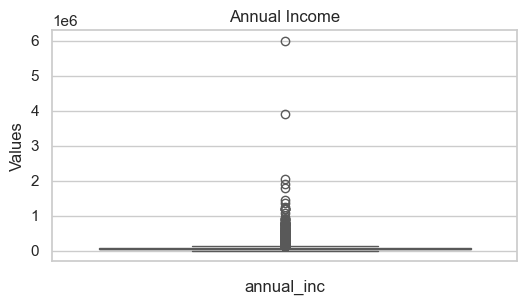

In [141]:
#Create a box plot for the annual_inc column to analyse for outliers
create_boxplot(filtered_loan_data, 'annual_inc', 'Annual Income')

In [142]:
# Analyse Annual Income
filtered_loan_data['annual_inc'].describe()

count    3.855600e+04
mean     6.878196e+04
std      6.423282e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

##### Annual income ranges from 4,000 to 6,000,000, with a median of 58,860. Because of the large range of incomes, we should take a log transform of the annual income variable.

In [143]:
# Create new column log_annual_inc with log transformation of annual_inc
filtered_loan_data['log_annual_inc'] = filtered_loan_data['annual_inc'].apply(lambda x: np.log10(x+1))
filtered_loan_data['log_annual_inc'].describe()

count    38556.000000
mean         4.763973
std          0.243141
min          3.602169
25%          4.602071
50%          4.769828
75%          4.913819
max          6.778151
Name: log_annual_inc, dtype: float64

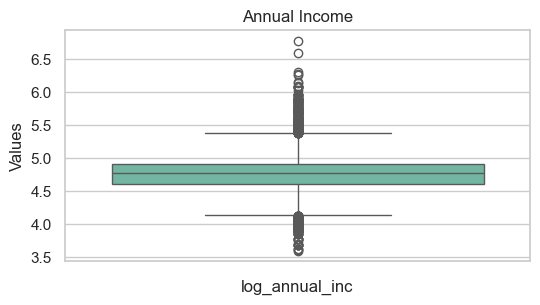

In [144]:
# Box plot for log transform annual income
create_boxplot(filtered_loan_data, 'log_annual_inc', 'Annual Income')

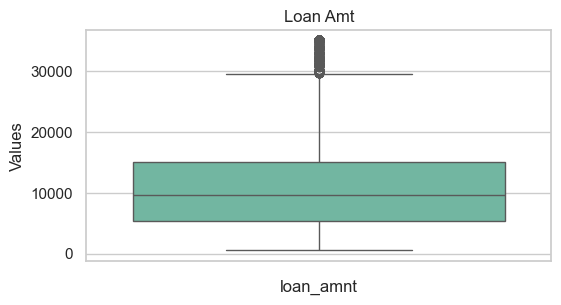

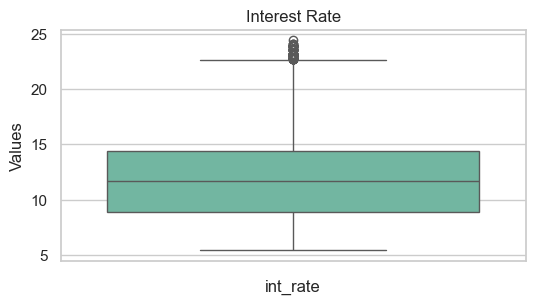

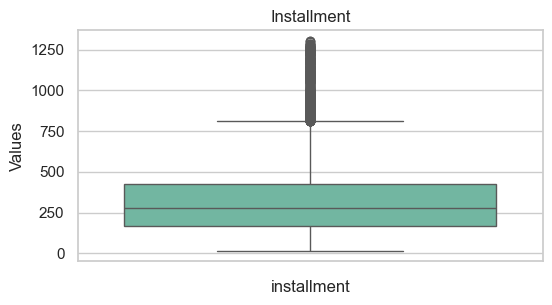

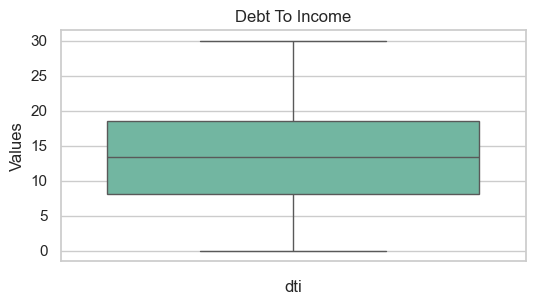

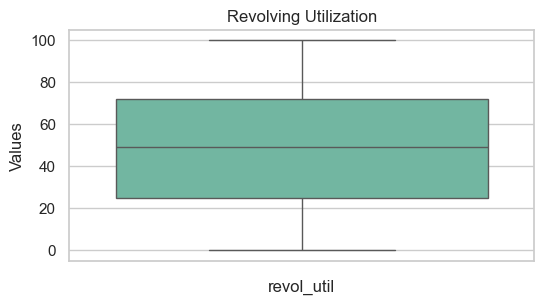

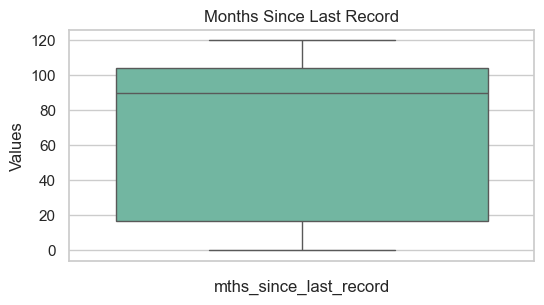

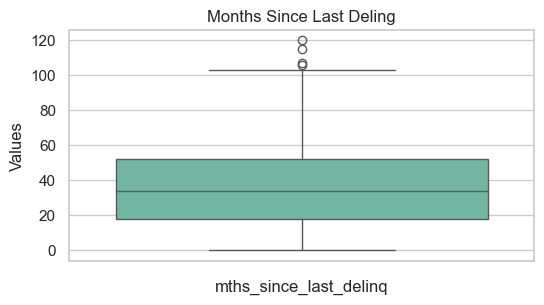

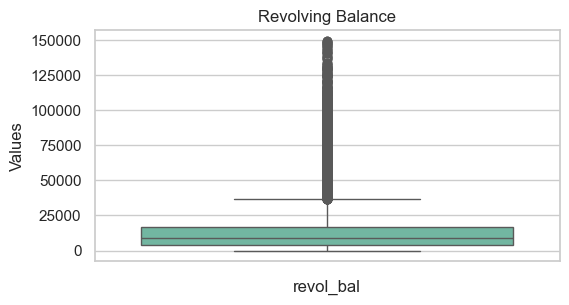

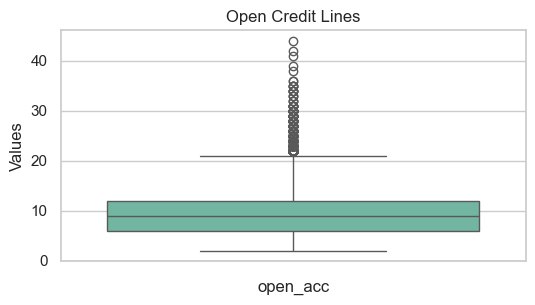

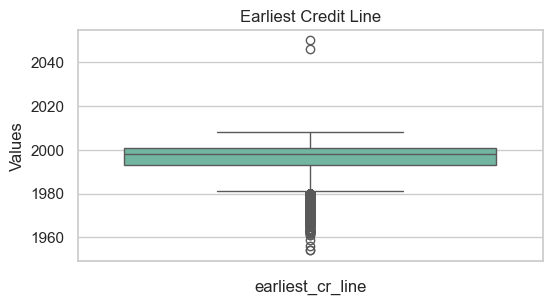

In [145]:
# Box plot for numerical variables
for col in ['loan_amnt', 'int_rate', 'installment', 'dti', 'revol_util', 'mths_since_last_record', 'mths_since_last_delinq', 'revol_bal', 'open_acc', 'earliest_cr_line']:
    title = {'loan_amnt': 'Loan Amt', 'int_rate'  : 'Interest Rate', 'installment' : 'Installment', 'dti' : 'Debt To Income', 
             'revol_util': 'Revolving Utilization', 'mths_since_last_record' : 'Months Since Last Record', 
             'mths_since_last_delinq': 'Months Since Last Deling', 'revol_bal': 'Revolving Balance', 'open_acc': 'Open Credit Lines',
            'earliest_cr_line': 'Earliest Credit Line'}
    create_boxplot(filtered_loan_data, col, title[col])

# Univariant Analysis
Varaibles used in univariant analysis are categorised as below:

### 1. Categorical Varaiables
   * Ordered Categorical:
     1. Grade (grade)
     2. Sub-grade (sub_grade)
        
   * UnOrdered Categorical:
     1. Home OwnerShip (home_ownership)
     2. Loan purpose (purpose)
     3. Loan Verification Status (verification_status)

### 2. Quantitative Varaibles
     1. Loam Amount (loan_amnt)
     2. Interest Rate (int_rate)
     3. Installment (installment)
     4. Annual Income (annual_inc)
     5. Earliest Credit Line (earliest_cr_line)
     6. Debt to Income Ratio (dti)
     7. No of Enquires for last 6 mnths (inq_last_6mths)
     8. Open Credit lines (open_acc)
     9. Revolving Balance (revol_bal) - outstanding amount of money you owe on credit cards or other forms of revolving credit.
     10. Revolving Util (revol_util) - percentage of your available credit that you're currently using on revolving accounts (primarily credit cards).
     11. Employee length (emp_length)
     12. Loan term (term - 36, 60)

# Segmented Univariant Analysis
     1. Loan purpose (purpose)
     2. Home OwnerShip (home_ownership)
     3. Sub-grade (sub_grade)
     4. Grade (grade)
     5. Loan Verification Status (verification_status)

### Univariant Analysis - Categorical Order Variables
* **Grade**
     1. **30.3%** loans provided to borrowers with **Grade B**.
     2. **26.1%** loans provided to borrowers with **Grade A**.
     3. **20.3%** loans provided to borrowers with **Grade C**.
* **Sub Grade**
     1. **7.5%** loans provided to borrowers with **Sub Grade A4**.
     2. **7.3%** loans provided to borrowers with **Sub Grade B3**.
     3. **7.0%** loans provided to borrowers with **Sub Grade A5**.

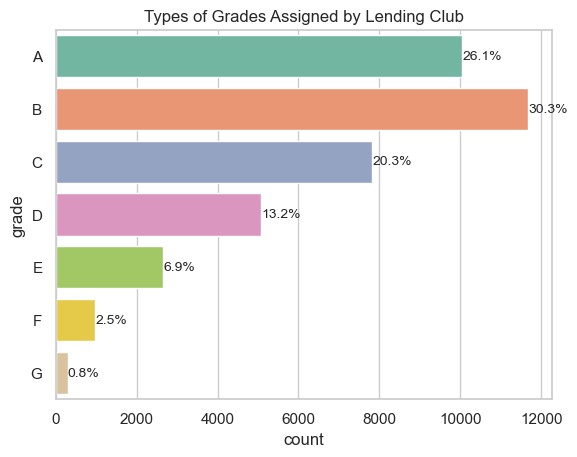

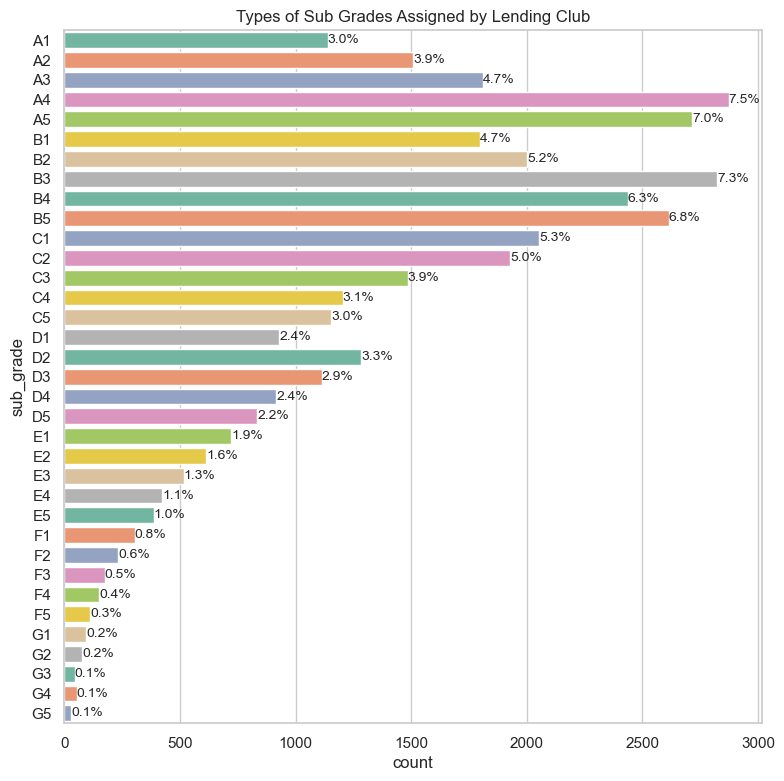

<Figure size 900x900 with 0 Axes>

In [146]:
# Univariant Analysis - Categorical Order Variables
cat_ord_var = ['grade', 'sub_grade']
cat_ord_var_title = {'grade' : 'Types of Grades Assigned by Lending Club', 'sub_grade': 'Types of Sub Grades Assigned by Lending Club'}
for col in cat_ord_var:
    ax = sns.countplot(data = filtered_loan_data, y = col, order=sorted(filtered_loan_data[col].unique()), color='orange', palette='Set2')
    calculate_percentage(ax, len(filtered_loan_data), orient='h')
    plt.title(cat_ord_var_title[col])
    plt.show()
    plt.figure(figsize=(9,9))

#### Univariant Analysis - Categorical UnOrder Variables
* **Home Ownership**
     1. **47.9%** of borrowers are **Renters**
     2. **44.1%** of borrowers are **Mortgage**
     3. **7.7%** of borrowers are **HomeOwners**
* **Purpose**
     1. **46.8%** are **Debt consolidation** loans
     2. **13.0%** are **Credit Card** loans
     3. **10.0%** are **Other purpose** loans
     4. **7.5%** are **Home Improvement** loans
     5. **5.6%** are **Major purpose** loans
* **Verification Status**
     1. **43.2%** of loans are **Not Verified**
     2. **31.7%** of loans are **Verified**
     3. **25.1%** of loans are **Source Verified**

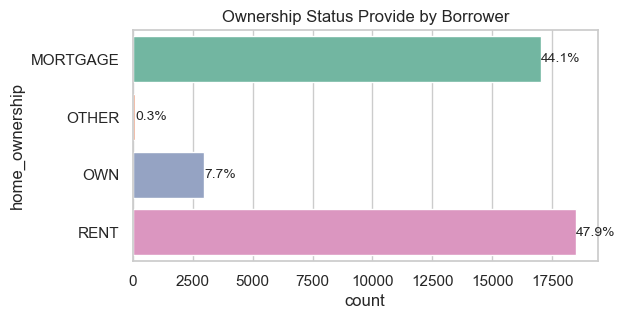

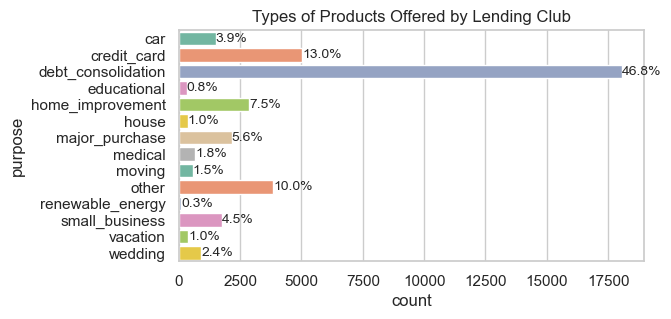

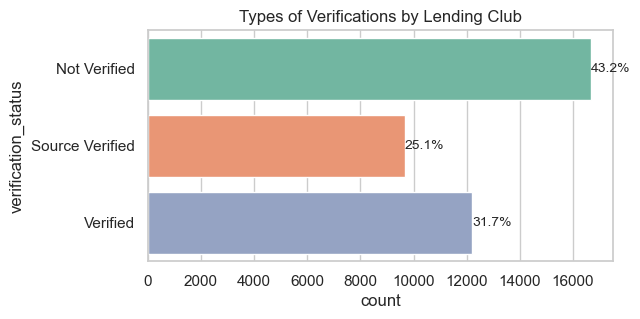

<Figure size 600x300 with 0 Axes>

In [147]:
# Univariant Analysis - Categorical UnOrder Variables
cat_unord_var = ['home_ownership', 'purpose', 'verification_status']
cat_unord_var_title = {'home_ownership' : 'Ownership Status Provide by Borrower', 'purpose': 'Types of Products Offered by Lending Club', 
                       'verification_status':'Types of Verifications by Lending Club'}
plt.figure(figsize=(6,3))
for col in cat_unord_var:
    ax = sns.countplot(data = filtered_loan_data, y = col, order=sorted(filtered_loan_data[col].unique()), color='green', palette='Set2')
    calculate_percentage(ax, len(filtered_loan_data), orient='h')
    plt.title(cat_unord_var_title[col])
    plt.show()
    plt.figure(figsize=(6,3))

#### Univariant Analysis - Quantitative Variables


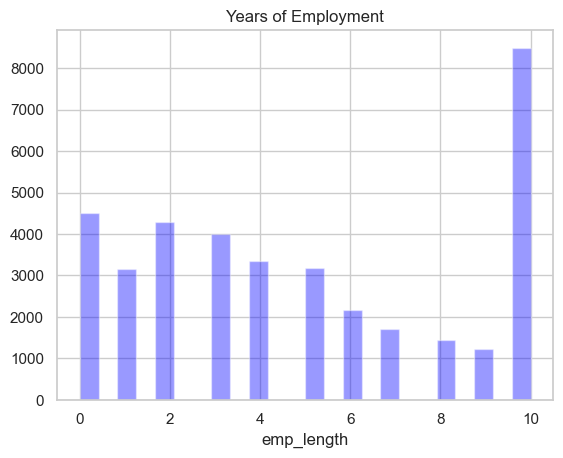

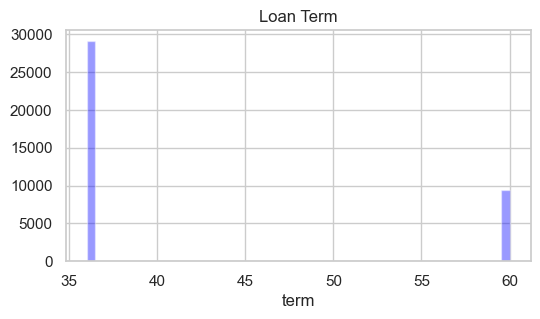

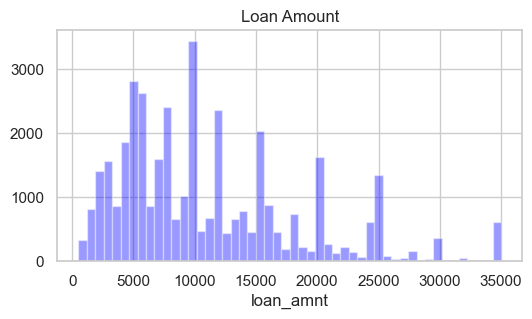

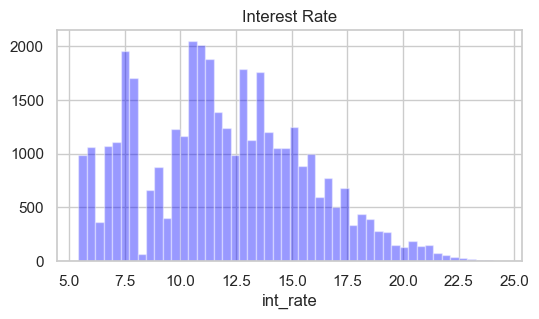

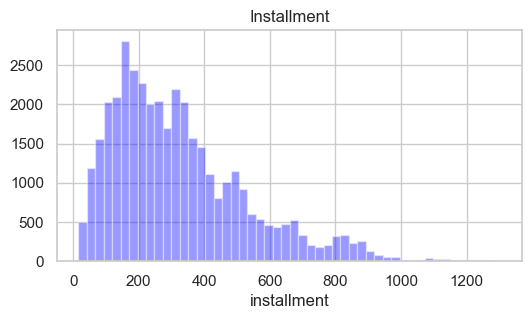

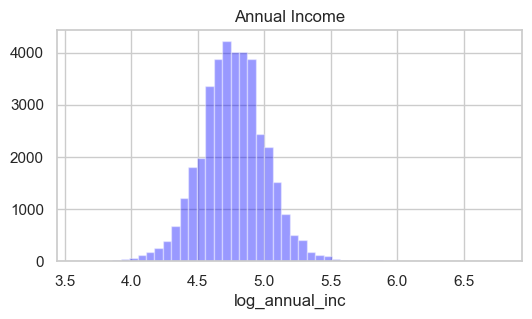

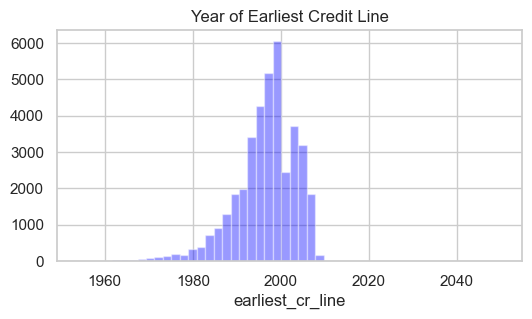

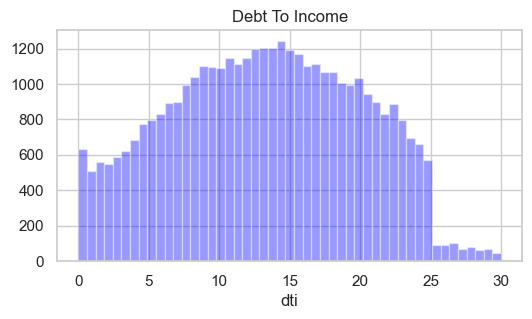

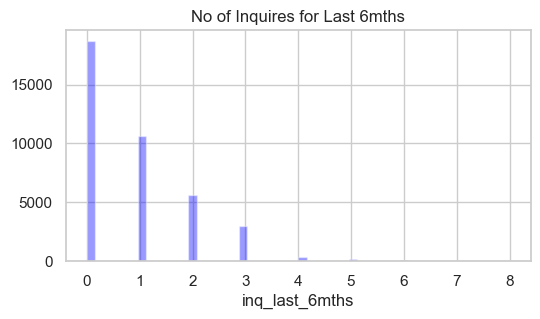

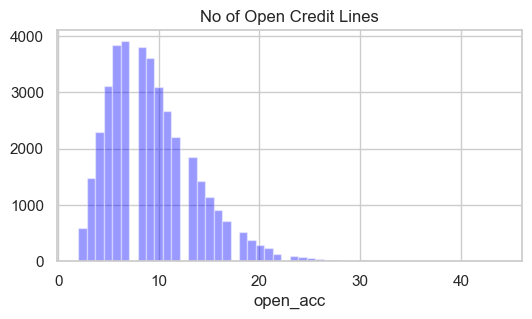

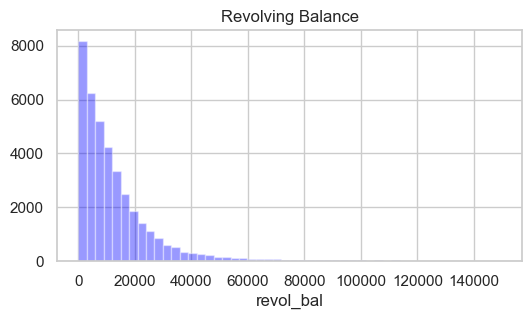

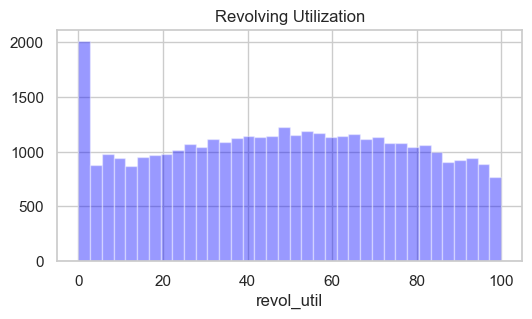

<Figure size 600x300 with 0 Axes>

In [148]:
qnt_cat_var = ['emp_length', 'term', 'loan_amnt', 'int_rate', 'installment', 'log_annual_inc', 'earliest_cr_line', 'dti', 
               'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util']
title_names = {'emp_length': 'Years of Employment', 'term': 'Loan Term', 'loan_amnt': 'Loan Amount', 'int_rate'  : 'Interest Rate', 
               'installment' : 'Installment', 'dti' : 'Debt To Income', 'log_annual_inc' : 'Annual Income',
               'revol_util': 'Revolving Utilization',  'revol_bal': 'Revolving Balance', 'open_acc': 'No of Open Credit Lines',
               'earliest_cr_line': 'Year of Earliest Credit Line', 'inq_last_6mths' : 'No of Inquires for Last 6mths'}

for i, col in enumerate(qnt_cat_var):
    sns.distplot(filtered_loan_data.loc[filtered_loan_data[col].notnull(), col], kde=False, color = 'blue')
    plt.title(title_names[col])
    plt.show()
    plt.figure(figsize=(6,3))

#### Segmented Univariant Analysis
* **Loan Purpose** - Charged-off loans are higher for Small business i.e **27.8%**
* **Home OwnerShip** - Charged-off loans are higher for Home Ownership - Other i.e. **17.82%**
* **Sub Grade** - Charged-off loans are higher for Sub Grade i.e. **47.79%**
* **Grade** - Charged-off loans are higher for Grade i.e. **33.78%**
* **Verification Status** - Charged-off loans are higher for Verified Borrowers i.e. **16.80%**

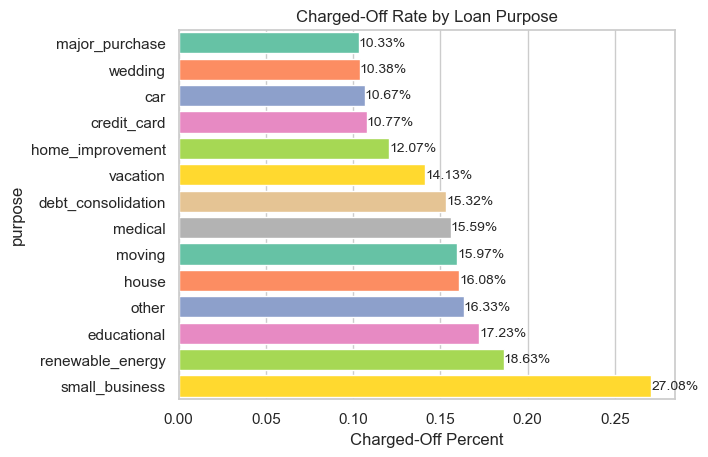

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

In [149]:
# Segmented Univariant Analysis - Loan Purpose
default_rates_by_loan_purpose = filtered_loan_data.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()
ax = sns.barplot(y=default_rates_by_loan_purpose.index, x=default_rates_by_loan_purpose.values, color='skyblue', saturation=1, palette='Set2')
calc_segmented_var_percent(default_rates_by_loan_purpose, ax, orient='h')
plt.xlabel('Charged-Off Percent')
plt.title('Charged-Off Rate by Loan Purpose')
plt.show()
plt.figure(figsize=(12,3))

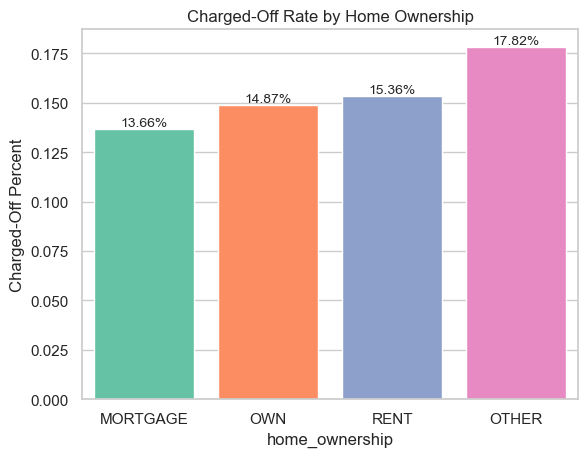

<Figure size 600x300 with 0 Axes>

<Figure size 600x300 with 0 Axes>

In [150]:
# Segmented Univariant Analysis - Home Ownership
default_rates_by_home_ownership = filtered_loan_data.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()
ax = sns.barplot(x=default_rates_by_home_ownership.index, y=default_rates_by_home_ownership.values, color='skyblue', saturation=1, palette='Set2')
calc_segmented_var_percent(default_rates_by_home_ownership, ax, orient='v')
    
plt.ylabel('Charged-Off Percent')
plt.title('Charged-Off Rate by Home Ownership')
plt.show()
plt.figure(figsize=(6,3))

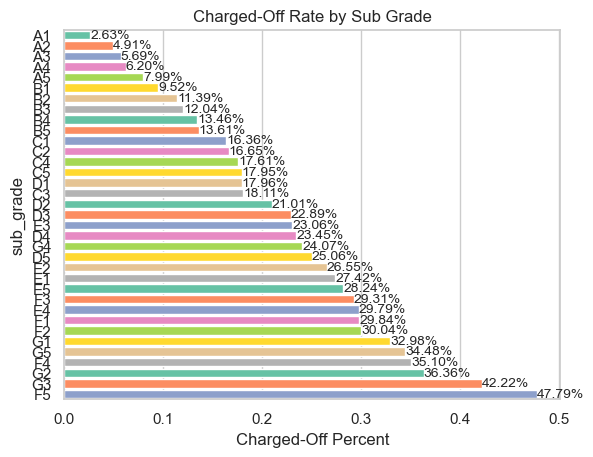

<Figure size 6000x900 with 0 Axes>

<Figure size 6000x900 with 0 Axes>

In [151]:
# Segmented Univariant Analysis - Sub Grade
default_rates_by_sub_grade = filtered_loan_data.groupby('sub_grade')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()
ax = sns.barplot(y=default_rates_by_sub_grade.index, x=default_rates_by_sub_grade.values, color='skyblue', saturation=1, palette='Set2')
calc_segmented_var_percent(default_rates_by_sub_grade, ax, orient='h')
plt.xlabel('Charged-Off Percent')
#plt.xticks(rotation=90)
plt.title('Charged-Off Rate by Sub Grade')
plt.show()
plt.figure(figsize=(60,9))

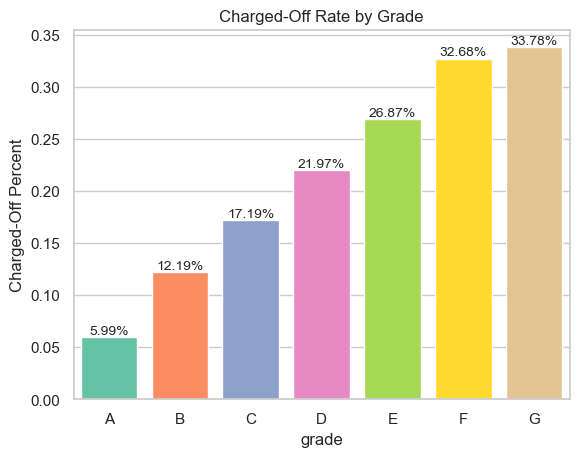

<Figure size 600x300 with 0 Axes>

<Figure size 600x300 with 0 Axes>

In [152]:
# Segmented Univariant Analysis - Grade
default_rates_by_grade = filtered_loan_data.groupby('grade')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()
ax=sns.barplot(x=default_rates_by_grade.index, y=default_rates_by_grade.values, color='skyblue', saturation=1, palette='Set2')
calc_segmented_var_percent(default_rates_by_grade, ax, orient='v')
plt.ylabel('Charged-Off Percent')
plt.title('Charged-Off Rate by Grade')
plt.show()
plt.figure(figsize=(6,3))

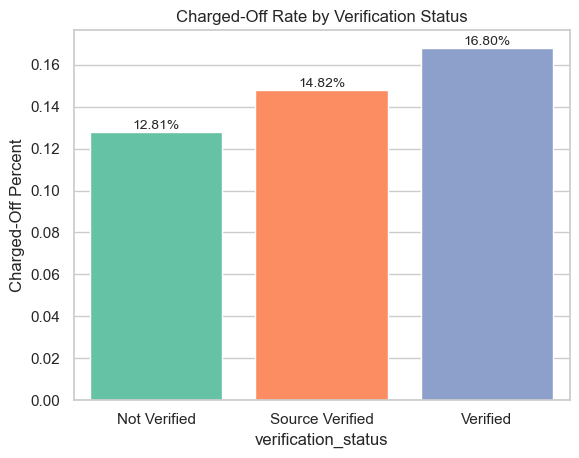

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [153]:
# Segmented Univariant Analysis - Verification Status
default_rates_by_verif_status = filtered_loan_data.groupby('verification_status')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()
ax = sns.barplot(x=default_rates_by_verif_status.index, y=default_rates_by_verif_status.values, color='skyblue', saturation=1, palette='Set2')
calc_segmented_var_percent(default_rates_by_verif_status, ax, orient='v')
plt.ylabel('Charged-Off Percent')
plt.title('Charged-Off Rate by Verification Status')
plt.show()
plt.figure(figsize=(3,3))

# Bivariant Analysis
   We Perform Bivariant Analysis on Loan Status, to identify the borrower is defaulted or not.

  * Categorical Variables
      1. Loan purpose (purpose)
      2. Home OwnerShip (home_ownership)
      3. Sub-grade (sub_grade)
      4. Grade (grade)
      5. Loan Verification Status (verification_status)

  * Continous Variables
      1. Loam Amount (loan_amnt)
      2. Interest Rate (int_rate)
      3. Installment (installment)
      4. Annual Income (annual_inc)
      5. Earliest Credit Line (earliest_cr_line)
      6. Debt to Income Ratio (dti)
      7. No of Enquires for last 6 mnths (inq_last_6mths)
      8. Open Credit lines (open_acc)
      9. Revolving Balance (revol_bal) - outstanding amount of money you owe on credit cards or other forms of revolving credit.
      10. Revolving Balance (revol_util) - percentage of your available credit that you're currently using on revolving accounts (primarily credit cards).
      11. Loan term (term - 36, 60)
      12. Public Records to Assess Creditworthiness(pub_rec)

##### Bivariant Categorical Analysis - Purpose Vs Loan Status

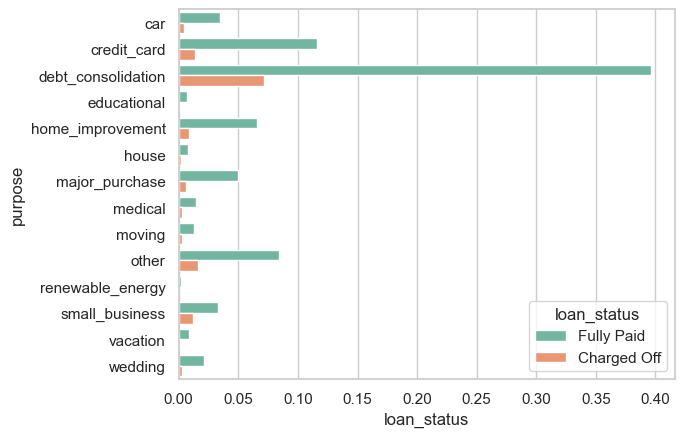

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

In [154]:
# Bivariant Analysis - Purpose Vs Loan Status
sns.countplot(data = filtered_loan_data, y = 'purpose', hue = 'loan_status', orient='h', dodge=True, order=sorted(filtered_loan_data['purpose'].unique()), stat='probability', palette='Set2', color='green')
plt.xlabel('loan_status')
plt.show()
plt.figure(figsize=(9,6))

##### Bivariant Categorical Analysis - Home Ownership Vs Loan Status

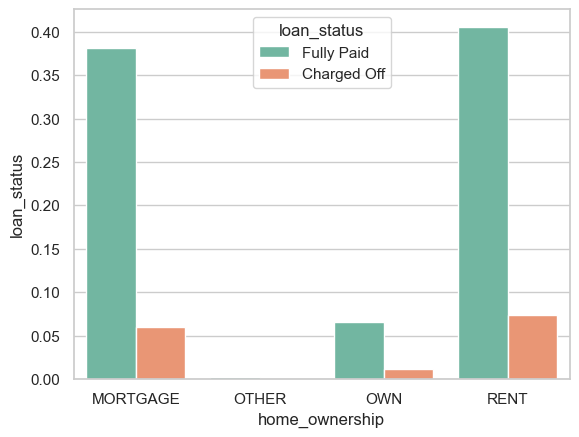

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [158]:
# Bivariant Analysis - Home Ownership Vs Loan Status
ax = sns.countplot(data = filtered_loan_data, x = 'home_ownership', hue = 'loan_status', dodge=True, order=sorted(filtered_loan_data['home_ownership'].unique()), stat='probability', palette='Set2', color='green')
plt.ylabel('loan_status')
plt.show()
plt.figure(figsize=(3,3))

##### Bivariant Categorical Analysis - Grade Vs Loan Status

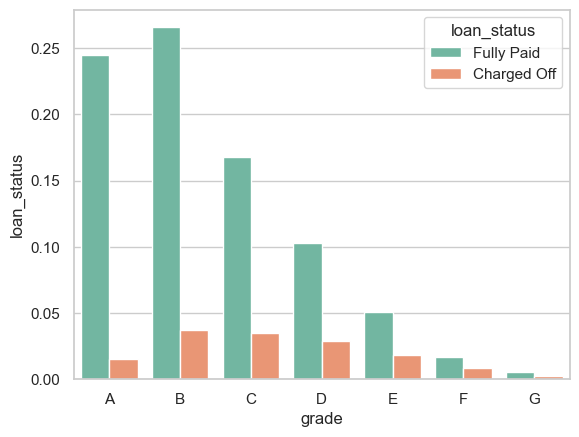

<Figure size 600x300 with 0 Axes>

<Figure size 600x300 with 0 Axes>

In [159]:
# Bivariant Analysis - Grade Vs Loan Status
sns.countplot(data = filtered_loan_data, x = 'grade', hue = 'loan_status', dodge=True, order=sorted(filtered_loan_data['grade'].unique()), stat='probability', palette='Set2', color='green')
plt.ylabel('loan_status')
plt.show()
plt.figure(figsize=(6,3))

##### Bivariant Categorical Analysis - Sub Grade Vs Loan Status

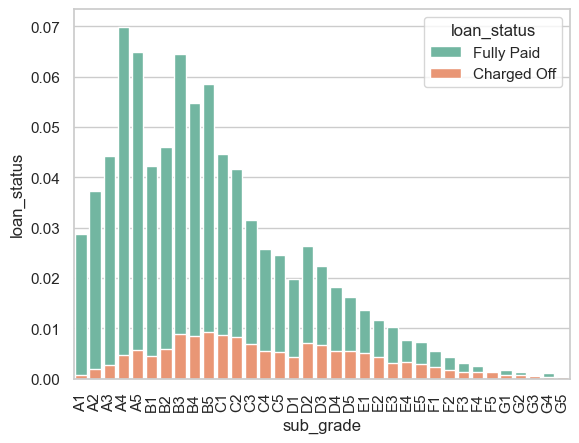

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [160]:
##### Bivariant Analysis - Sub Grade Vs Loan Status
sns.countplot(data = filtered_loan_data, x = 'sub_grade', hue = 'loan_status', dodge=False, order=sorted(filtered_loan_data['sub_grade'].unique()), stat='probability', palette='Set2', color='green')
plt.ylabel('loan_status')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12,12))

##### Bivariant Categorical Analysis - Verification Status Vs Loan Status

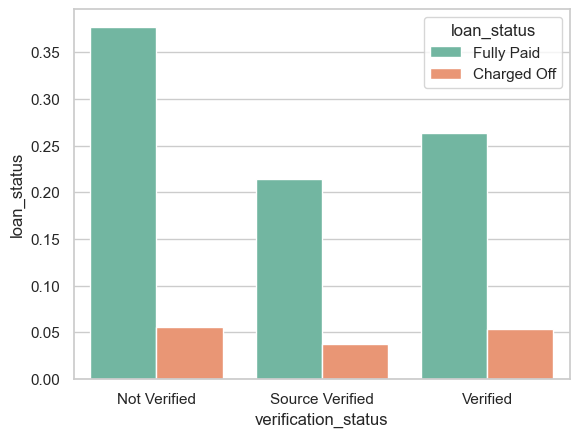

<Figure size 600x300 with 0 Axes>

<Figure size 600x300 with 0 Axes>

In [161]:
##### Bivariant Analysis - Verification Status Vs Loan Status
sns.countplot(data = filtered_loan_data, x = 'verification_status', hue = 'loan_status', dodge=True, order=sorted(filtered_loan_data['verification_status'].unique()), stat='probability', palette='Set2', color='green')
plt.ylabel('loan_status')
plt.show()
plt.figure(figsize=(6,3))

##### Bivariant Continous Variable Analysis - Loan Amount by Loan Status
* Charged-Off loans are tend to have higher loan amount

In [162]:
filtered_loan_data.groupby('loan_status')['loan_amnt'].describe()

count          mean          std    min     25%      50%  \
loan_status                                                               
Charged Off   5621.0  12104.612169  8087.841610  900.0  5600.0  10000.0   
Fully Paid   32935.0  10867.844998  7200.652583  500.0  5200.0   9600.0   

                 75%      max  
loan_status                    
Charged Off  16500.0  35000.0  
Fully Paid   15000.0  35000.0

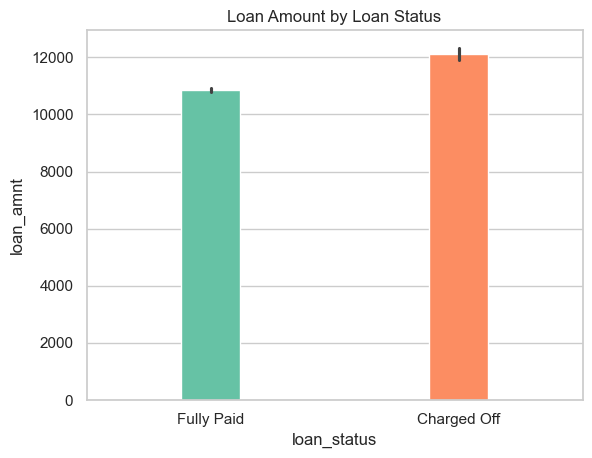

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [163]:
# Bivariant Continous Analysis - Loan Amount by Loan Status
ax = sns.barplot(y='loan_amnt', x='loan_status', data=filtered_loan_data, color='green', saturation=1, palette='Set2')
reduce_bar_plot_width(ax)
plt.title('Loan Amount by Loan Status')
plt.show()
plt.figure(figsize=(3,3))

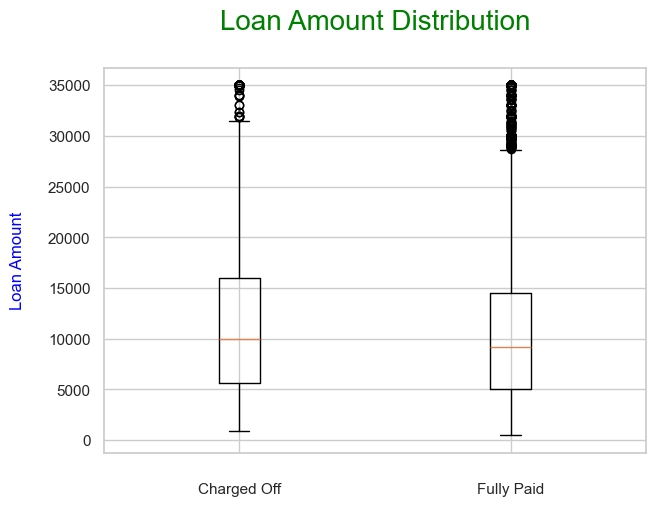

In [170]:
plt.figure(figsize=(7,5))
plt.boxplot([filtered_loan_data[filtered_loan_data["loan_status"]=="Charged Off"]["funded_amnt"], filtered_loan_data[filtered_loan_data["loan_status"]=="Fully Paid"]["funded_amnt"]])
plt.title("Loan Amount Distribution\n", fontdict={"fontsize":20, "fontweight":5, "color":"Green"})
plt.ylabel("Loan Amount\n", fontdict={"fontsize":12, "fontweight":5, "color":"Blue"})
plt.xticks((1,2), ["\nCharged Off", "\nFully Paid"])
plt.show()

##### Bivariant Continous Variable Analysis - Interest Rate by Loan Status
* Charged-off loans are tend to have higher interest rate.

In [164]:
# Statistics summary by loan status
filtered_loan_data.groupby('loan_status')['int_rate'].describe()

count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   5621.0  13.823161  3.655108  5.42  11.34  13.61  16.40  24.40
Fully Paid   32935.0  11.609581  3.600553  5.42   8.49  11.49  13.99  24.11

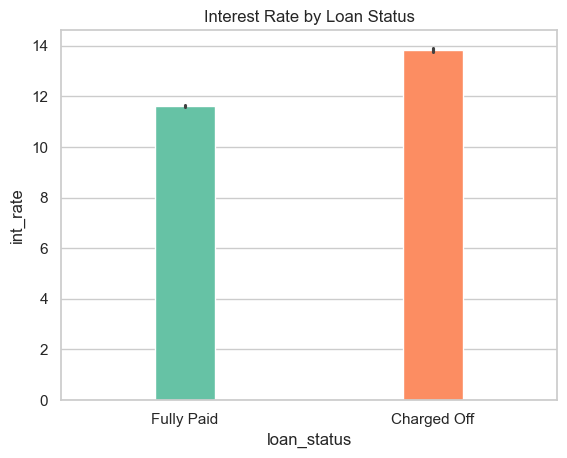

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [165]:
# Bivariant Continous Analysis - Interest Rate by Loan Status
ax2 = sns.barplot(y='int_rate', x='loan_status', data=filtered_loan_data, color=['blue', 'green'], saturation=1, palette='Set2')
reduce_bar_plot_width(ax2)
plt.title('Interest Rate by Loan Status')
plt.show()
plt.figure(figsize=(3,3))

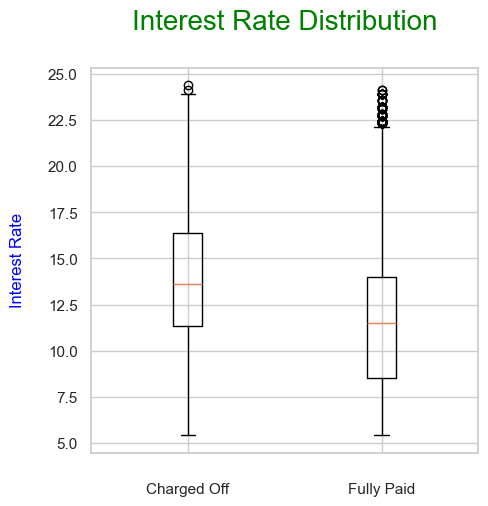

In [171]:
plt.figure(figsize=(5,5))
plt.boxplot([filtered_loan_data[filtered_loan_data["loan_status"]=="Charged Off"]["int_rate"], filtered_loan_data[filtered_loan_data["loan_status"]=="Fully Paid"]["int_rate"]])
plt.title("Interest Rate Distribution\n", fontdict={"fontsize":20, "fontweight":5, "color":"Green"})
plt.ylabel("Interest Rate\n", fontdict={"fontsize":12, "fontweight":5, "color":"Blue"})
plt.xticks((1,2), ["\nCharged Off", "\nFully Paid"])
plt.show()

##### Bivariant Continous Variable Analysis - Installment by Loan Status
* Charged-off loans are tend to have higher installments.

In [172]:
# Statistics summary by loan status
filtered_loan_data.groupby('loan_status')['installment'].describe()

count        mean         std    min      25%     50%     75%  \
loan_status                                                                    
Charged Off   5621.0  336.153926  217.053889  22.79  168.620  293.87  457.67   
Fully Paid   32935.0  320.152863  207.112091  15.69  165.265  275.64  421.01   

                 max  
loan_status           
Charged Off  1305.19  
Fully Paid   1295.21

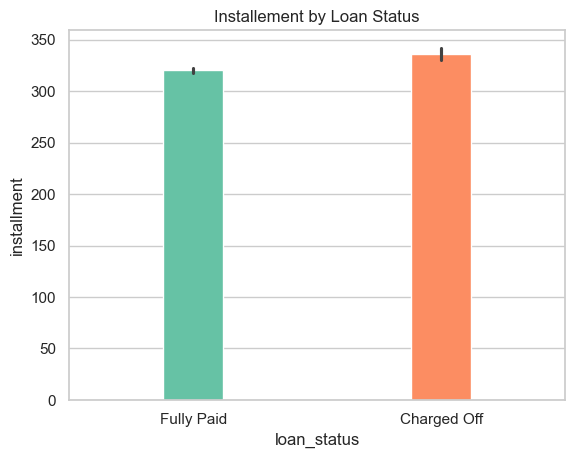

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [173]:
# Bivariant Continous Analysis - Installment by Loan Status
ax3 = sns.barplot(y='installment', x='loan_status', data=filtered_loan_data, color=['blue', 'green'], saturation=1, palette='Set2')
reduce_bar_plot_width(ax3)
plt.title('Installement by Loan Status')
plt.show()
plt.figure(figsize=(3,3))

##### Bivariant Continous Variable Analysis - Annual Income by Loan Status
* Individuals with higher income are more likely to pay off their loans.

In [174]:
# Statistics summary by loan status
filtered_loan_data.groupby('loan_status')['log_annual_inc'].describe()

count      mean       std       min       25%       50%  \
loan_status                                                              
Charged Off   5621.0  4.723190  0.243219  3.610767  4.568213  4.724284   
Fully Paid   32935.0  4.770933  0.242447  3.602169  4.614481  4.778158   

                  75%       max  
loan_status                      
Charged Off  4.875067  6.096910  
Fully Paid   4.924284  6.778151

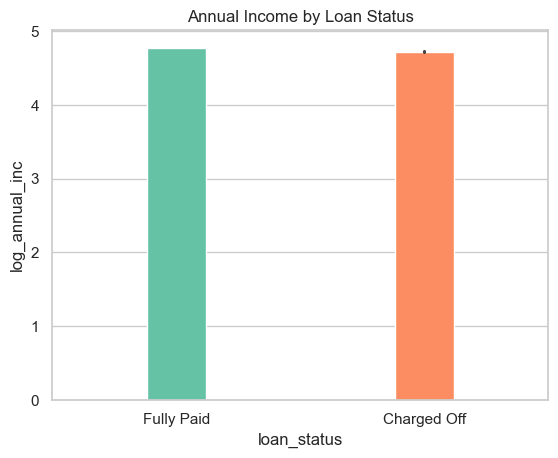

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [175]:
# Bivariant Continous Analysis - Annual Income by Loan Status
ax3 = sns.barplot(y='log_annual_inc', x='loan_status', data=filtered_loan_data, color=['blue', 'green'], saturation=1, palette='Set2')
reduce_bar_plot_width(ax3)
plt.title('Annual Income by Loan Status')
plt.show()
plt.figure(figsize=(3,3))

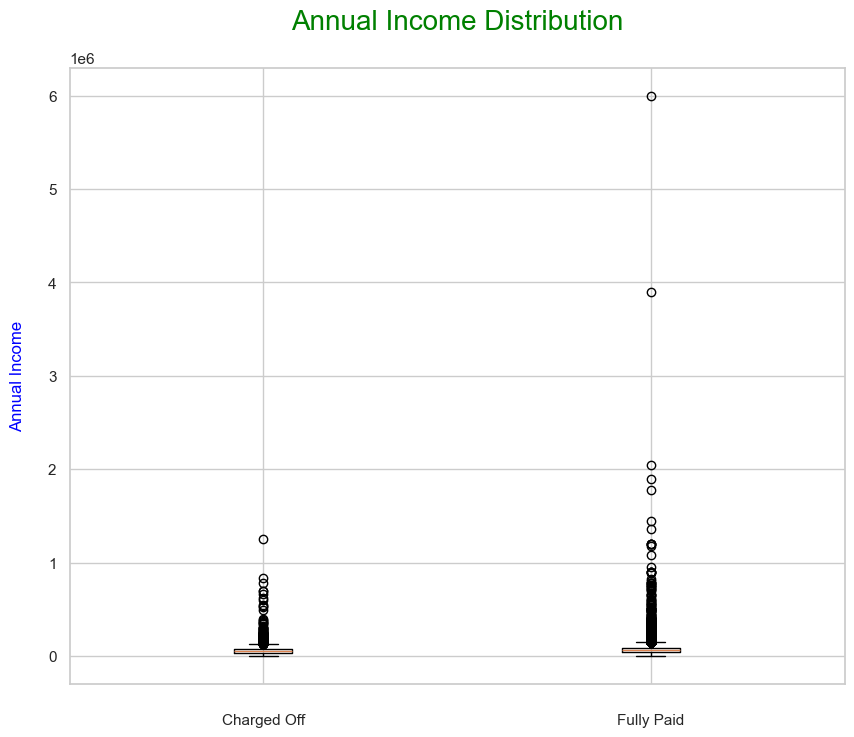

In [179]:
plt.figure(figsize=(10,8))
plt.boxplot([filtered_loan_data[filtered_loan_data["loan_status"]=="Charged Off"]["annual_inc"], filtered_loan_data[filtered_loan_data["loan_status"]=="Fully Paid"]["annual_inc"]])
plt.title("Annual Income Distribution\n", fontdict={"fontsize":20, "fontweight":5, "color":"Green"})
plt.ylabel("Annual Income\n", fontdict={"fontsize":12, "fontweight":5, "color":"Blue"})
plt.xticks((1,2), ["\nCharged Off", "\nFully Paid"])
plt.show()

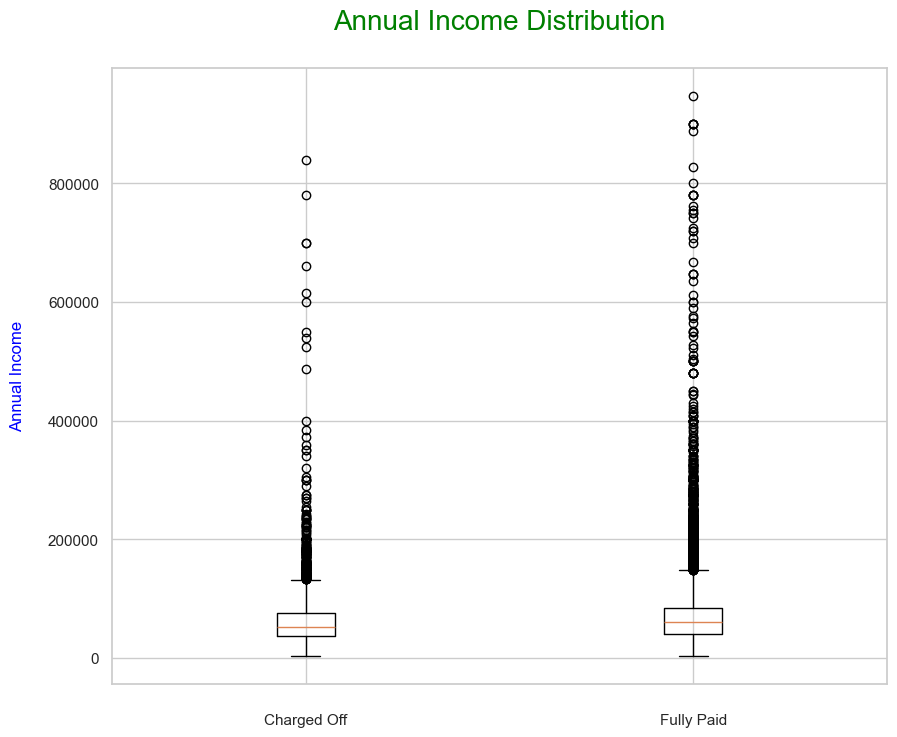

In [180]:
# Removing Outliers, i.e. creating this box plot by filtering out values of annual income > 1000000
plt.figure(figsize=(10,8))
plt.boxplot([filtered_loan_data[(filtered_loan_data["loan_status"]=="Charged Off") & (filtered_loan_data["annual_inc"]<1000000)]["annual_inc"], 
             filtered_loan_data[(filtered_loan_data["loan_status"]=="Fully Paid") & (filtered_loan_data["annual_inc"]<1000000)]["annual_inc"]])
plt.title("Annual Income Distribution\n", fontdict={"fontsize":20, "fontweight":5, "color":"Green"})
plt.ylabel("Annual Income\n", fontdict={"fontsize":12, "fontweight":5, "color":"Blue"})
plt.xticks((1,2), ["\nCharged Off", "\nFully Paid"])
plt.show()

##### Bivariant Continous Variable Analysis - Year of Earliest Credit Line by Loan Status
* Loan status does not appear to vary much with Earliest Credit Line on average

In [181]:
# Statistics summary by loan status
filtered_loan_data.groupby('loan_status')['earliest_cr_line'].describe()

count         mean       std     min     25%     50%     75%  \
loan_status                                                                   
Charged Off   5621.0  1996.949475  6.759225  1962.0  1994.0  1998.0  2001.0   
Fully Paid   32935.0  1996.553788  6.825187  1954.0  1993.0  1998.0  2001.0   

                max  
loan_status          
Charged Off  2008.0  
Fully Paid   2050.0

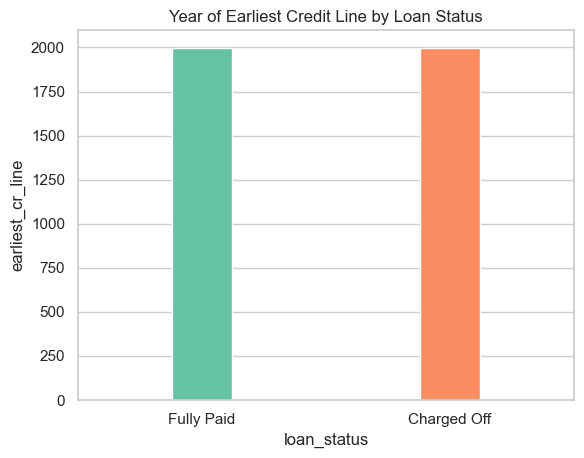

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [182]:
# Bivariant Continous Analysis - Year of Earliest Credit Line by Loan Status
ax4 = sns.barplot(y='earliest_cr_line', x='loan_status', data=filtered_loan_data, color=['blue', 'green'], saturation=1, palette='Set2')
reduce_bar_plot_width(ax4)
plt.title('Year of Earliest Credit Line by Loan Status')
plt.show()
plt.figure(figsize=(3,3))

##### Bivariant Continous Variable Analysis - Debt to Income Ratio by Loan Status
* Charged-off loans are tend to have higher debt to income ratio.

In [183]:
# Statistics summary by loan status
filtered_loan_data.groupby('loan_status')['dti'].describe()

count       mean       std  min   25%   50%    75%    max
loan_status                                                             
Charged Off   5621.0  13.999418  6.587509  0.0  9.05  14.3  19.29  29.85
Fully Paid   32935.0  13.150436  6.679792  0.0  7.98  13.2  18.40  29.99

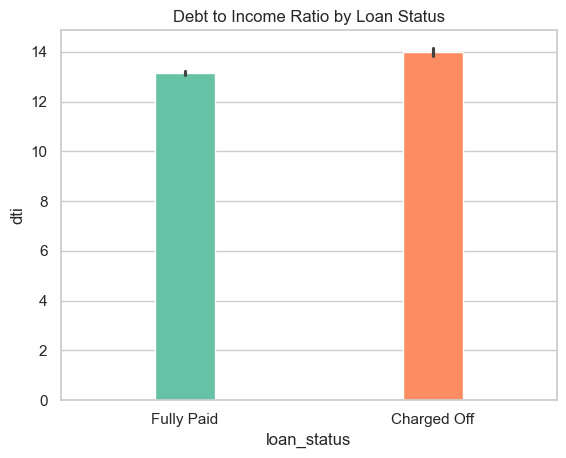

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [184]:
# Bivariant Continous Analysis - Debt to Income Ratio by Loan Status
ax5 = sns.barplot(y='dti', x='loan_status', data=filtered_loan_data, color=['blue', 'green'], saturation=1, palette='Set2')
reduce_bar_plot_width(ax5)
plt.title('Debt to Income Ratio by Loan Status')
plt.show()
plt.figure(figsize=(3,3))

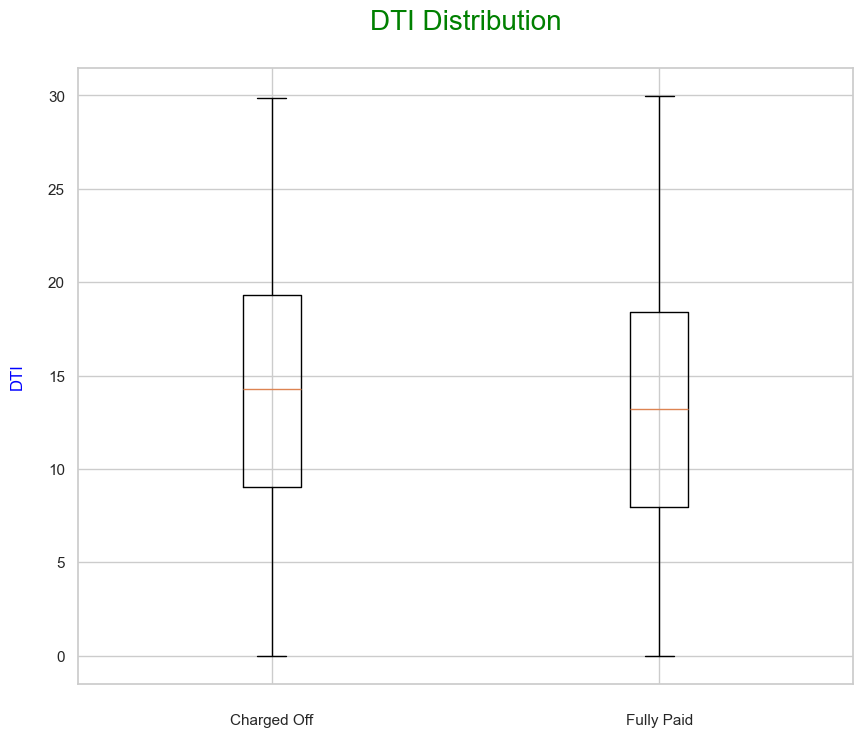

In [189]:
plt.figure(figsize=(10,8))
plt.boxplot([filtered_loan_data[filtered_loan_data["loan_status"]=="Charged Off"]["dti"], filtered_loan_data[filtered_loan_data["loan_status"]=="Fully Paid"]["dti"]])
plt.title("DTI Distribution\n", fontdict={"fontsize":20, "fontweight":5, "color":"Green"})
plt.ylabel("DTI\n", fontdict={"fontsize":12, "fontweight":5, "color":"Blue"})
plt.xticks((1,2), ["\nCharged Off", "\nFully Paid"])
plt.show()

##### Bivariant Continous Variable Analysis - No of Inquires Last 6 mths by Loan Status
* Charged-off are loans are tend to higher inquires on credit for last 6 months.

In [190]:
# Statistics summary by loan status
filtered_loan_data.groupby('loan_status')['inq_last_6mths'].describe()

count      mean       std  min  25%  50%  75%  max
loan_status                                                      
Charged Off   5621.0  1.057997  1.154374  0.0  0.0  1.0  2.0  8.0
Fully Paid   32935.0  0.839684  1.053404  0.0  0.0  1.0  1.0  8.0

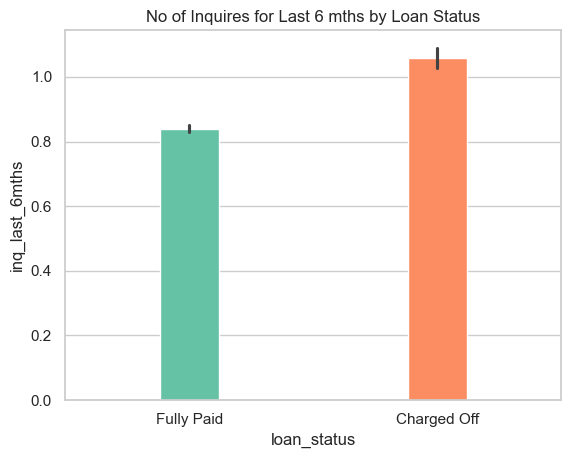

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [186]:
# Bivariant Continous Analysis - No of Inquires Last 6 mths by Loan Status
ax6 = sns.barplot(y='inq_last_6mths', x='loan_status', data=filtered_loan_data, color=['blue', 'green'], saturation=1, palette='Set2')
reduce_bar_plot_width(ax6)
plt.title('No of Inquires for Last 6 mths by Loan Status')
plt.show()
plt.figure(figsize=(3,3))

##### Bivariant Continous Variable Analysis - Revolving Balance by Loan Status
* Charged-off loans are having slightly higher Revolving balance.

In [191]:
# Statistics summary by loan status
filtered_loan_data.groupby('loan_status')['revol_bal'].describe()

count          mean           std  min     25%     50%  \
loan_status                                                             
Charged Off   5621.0  13513.861057  15168.705817  0.0  3966.0  9211.0   
Fully Paid   32935.0  13251.854258  15984.881044  0.0  3603.0  8684.0   

                 75%       max  
loan_status                     
Charged Off  17518.0  148829.0  
Fully Paid   16813.0  149588.0

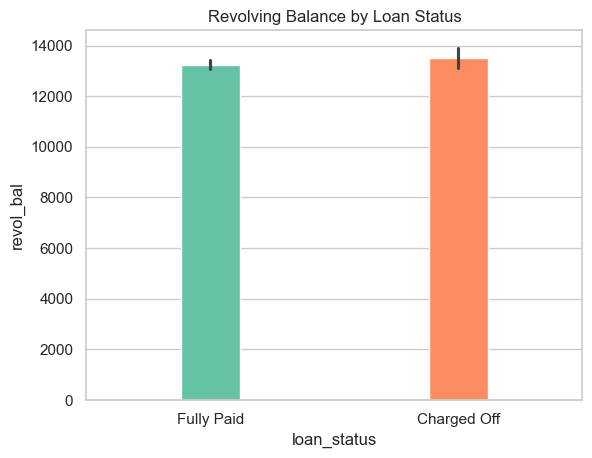

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [192]:
# Bivariant Continous Analysis - Revolving Balance by Loan Status
ax8 = sns.barplot(y='revol_bal', x='loan_status', data=filtered_loan_data, color=['blue', 'green'], saturation=1, palette='Set2')
reduce_bar_plot_width(ax8)
plt.title('Revolving Balance by Loan Status')
plt.show()
plt.figure(figsize=(3,3))

##### Bivariant Continous Variable Analysis - Revolving Utilization by Loan Status
* Charged-off loans are tend to have higher Revolving utilization.

In [193]:
# Statistics summary by loan status
filtered_loan_data.groupby('loan_status')['revol_util'].describe()

count       mean       std  min   25%   50%   75%   max
loan_status                                                           
Charged Off   5621.0  55.404627  28.02443  0.0  34.3  58.2  78.9  99.9
Fully Paid   32935.0  47.483254  28.30425  0.0  23.8  47.5  70.8  99.9

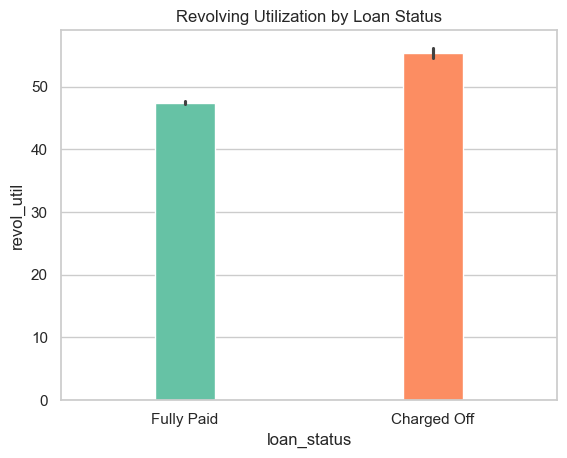

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [194]:
# Bivariant Continous Analysis - Revolving Utilization by Loan Status
ax9 = sns.barplot(y='revol_util', x='loan_status', data=filtered_loan_data, color=['blue', 'green'], saturation=1, palette='Set2')
reduce_bar_plot_width(ax9)
plt.title('Revolving Utilization by Loan Status')
plt.show()
plt.figure(figsize=(3,3))

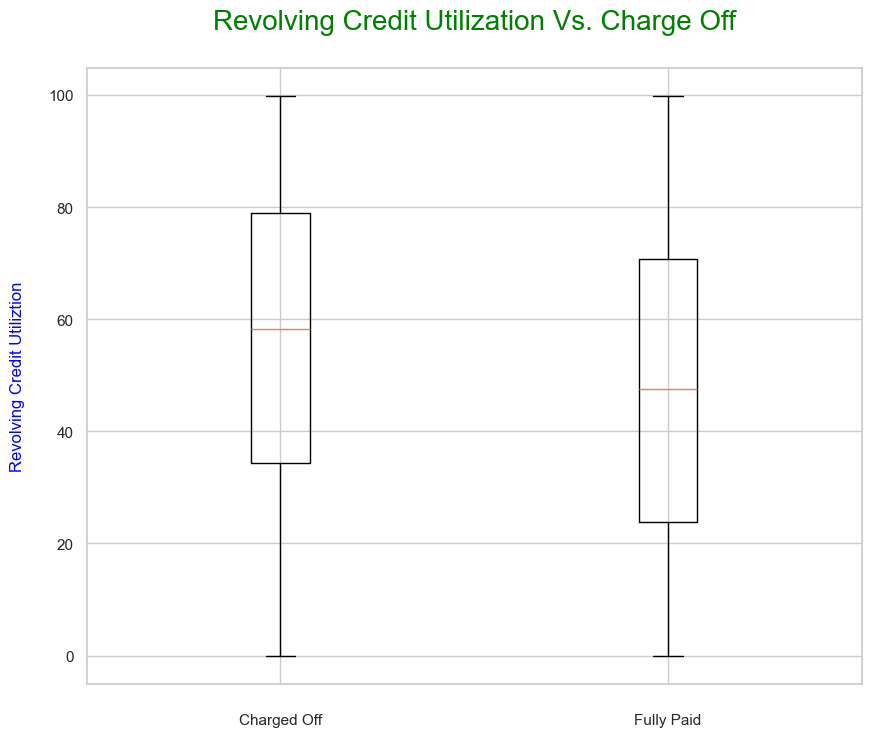

In [198]:
plt.figure(figsize=(10,8))
plt.boxplot([filtered_loan_data[filtered_loan_data["loan_status"]=="Charged Off"]["revol_util"], filtered_loan_data[filtered_loan_data["loan_status"]=="Fully Paid"]["revol_util"]])
plt.title("Revolving Credit Utilization Vs. Charge Off\n", fontdict={"fontsize":20, "fontweight":5, "color":"Green"})
plt.ylabel("Revolving Credit Utiliztion\n", fontdict={"fontsize":12, "fontweight":5, "color":"Blue"})
plt.xticks((1,2), ["\nCharged Off", "\nFully Paid"])
plt.show()

##### Bivariant Continous Variable Analysis - Loan Term by Loan Status
* Charged-off loans are tend to have higher loan terms.

In [199]:
# Statistics summary by loan status
filtered_loan_data.groupby('loan_status')['term'].describe()

count       mean        std   min   25%   50%   75%   max
loan_status                                                             
Charged Off   5621.0  46.247287  11.872366  36.0  36.0  36.0  60.0  60.0
Fully Paid   32935.0  41.159982   9.859873  36.0  36.0  36.0  36.0  60.0

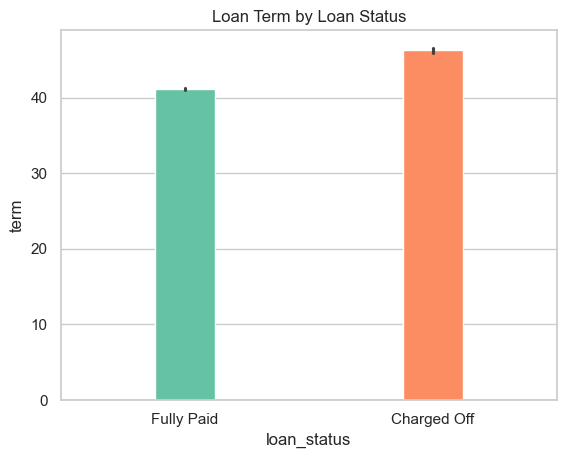

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [200]:
# Bivariant Continous Analysis - Loan Term by Loan Status
ax11 = sns.barplot(y='term', x='loan_status', data=filtered_loan_data, color=['blue', 'green'], saturation=1, palette='Set2')
reduce_bar_plot_width(ax11)
plt.title('Loan Term by Loan Status')
plt.show()
plt.figure(figsize=(3,3))

##### Bivariant Analysis - Public Records to Assess Creditworthiness by Loan Status
* Charged-off loads are tend to have higher public records of Creditworthiness.

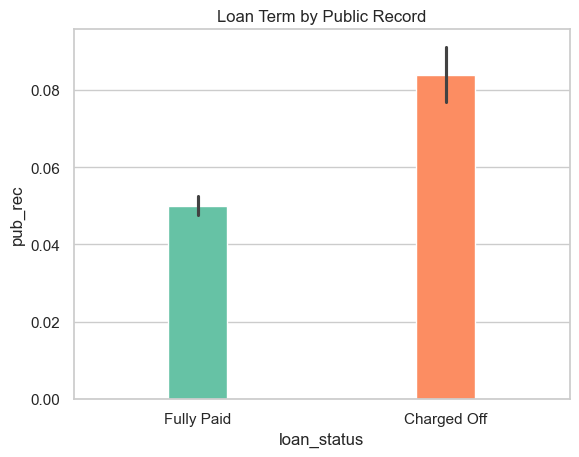

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [204]:
ax12 = sns.barplot(y='pub_rec', x='loan_status', data=filtered_loan_data, color=['blue', 'green'], saturation=1, palette='Set2')
reduce_bar_plot_width(ax12)
plt.title('Loan Term by Public Record')
plt.show()
plt.figure(figsize=(3,3))

   delinq_2yrs    loan_status  percentage
0            0  Charged Off %        14.3
1            1  Charged Off %        15.8
2            2  Charged Off %        19.3
3            3  Charged Off %        16.5
4            4  Charged Off %        22.0
5            5  Charged Off %        14.3
6            6  Charged Off %        10.0
7            7  Charged Off %        25.0
8            8  Charged Off %        50.0
9            9  Charged Off %         NaN
10          11  Charged Off %         NaN
11       Total  Charged Off %        14.6
12           0   Fully Paid %        85.7
13           1   Fully Paid %        84.2
14           2   Fully Paid %        80.7
15           3   Fully Paid %        83.5
16           4   Fully Paid %        78.0
17           5   Fully Paid %        85.7
18           6   Fully Paid %        90.0
19           7   Fully Paid %        75.0
20           8   Fully Paid %        50.0
21           9   Fully Paid %       100.0
22          11   Fully Paid %     

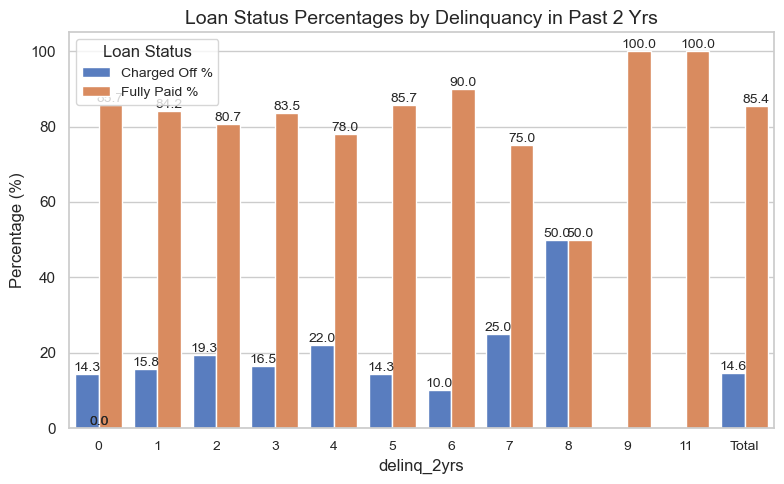

In [224]:
df_delinq_2yrs_pivot = pd.pivot_table(data=filtered_loan_data, values="funded_amnt", index="delinq_2yrs", columns="loan_status", aggfunc="count", margins=True, margins_name="Total")
percentages = round(df_delinq_2yrs_pivot.div(df_delinq_2yrs_pivot["Total"], axis=0)*100, 1)
percentages.columns = [f"{col} %" for col in percentages.columns]
percentages = percentages.drop(columns=["Total %"])
df_long = percentages.reset_index().melt(id_vars="delinq_2yrs", var_name="loan_status", value_name="percentage")
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_long, x="delinq_2yrs", y="percentage", hue="loan_status", palette="muted")
# Customize the plot
plt.title("Loan Status Percentages by Delinquancy in Past 2 Yrs", fontsize=14)
plt.xlabel("delinq_2yrs", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title="Loan Status", fontsize=10)
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width()/2, # x-coordinate
        bar.get_height(),                # y-coordinate
        f"{bar.get_height():.1f}",       # value formatted to 1 decimal place
        ha="center", va="bottom",        # text alignment
        fontsize=10                      # fontsize
    )
plt.tight_layout()



# Show the plot
plt.show()



In [ ]:
plt.bar()

### Data Driven Metrics
No of Open credit accounts will leads to Charged-off loans.To do further analysis we need to derive data from principal balance amount, total received principal and funded amount.

**As the number of open accounts becomes very high, it indicates a very high level of risk profile.**

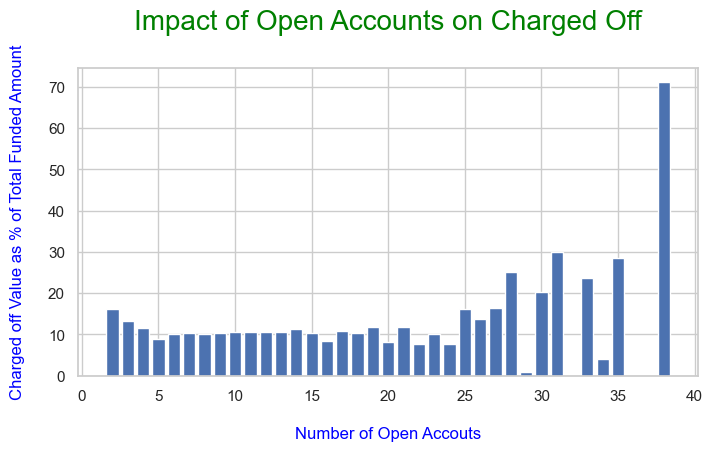

In [228]:
# Open Account data is derived from funded amount and total received principal
df_op_ac = filtered_loan_data.groupby(by=["open_acc","loan_status"])[["funded_amnt", "total_rec_prncp"]].sum().reset_index()
df_op_ac["prncp_bal_amt"] = df_op_ac["funded_amnt"] - df_op_ac["total_rec_prncp"]
total_funded = df_op_ac.groupby("open_acc")["funded_amnt"].sum().reset_index()
total_funded.rename(columns={"funded_amnt":"total_amnt"}, inplace=True)
merged_df = pd.merge(df_op_ac, total_funded, how="left", on="open_acc")
merged_df["prcnt_bal"] = round((merged_df["prncp_bal_amt"] / merged_df["total_amnt"])*100,1)

# Plot the bar
x = merged_df[merged_df["loan_status"]=="Charged Off"]["open_acc"]
y = merged_df[merged_df["loan_status"]=="Charged Off"]["prcnt_bal"]
plt.figure(figsize=(8,4))
plt.bar(x, y)
plt.title("Impact of Open Accounts on Charged Off\n", fontdict={"fontsize":20, "fontweight":5, "color":"Green"})
plt.xlabel("\nNumber of Open Accouts", fontdict={"fontsize":12, "fontweight":5, "color":"blue"})
plt.ylabel("Charged off Value as % of Total Funded Amount\n", fontdict={"fontsize":12, "fontweight":5, "color":"Blue"})
plt.show()


In [ ]:
# We will do a bivariate analysis of pub_rec and pub_rec_bankruptcies. We will find whether there is any impact of bankruptcy record on the outstanding loan value.

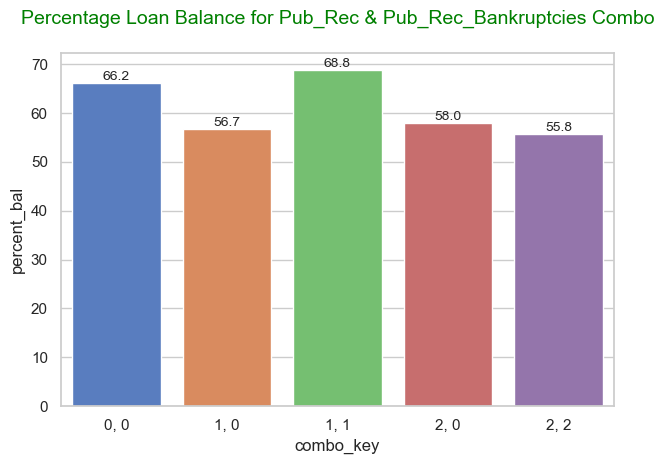

In [243]:
df_pu_rec_bnkr = filtered_loan_data.groupby(by=["pub_rec","pub_rec_bankruptcies","loan_status"])[["funded_amnt", "total_rec_prncp"]].sum().reset_index()
df_pu_rec_bnkr["percent_bal"] = round((1-df_pu_rec_bnkr["total_rec_prncp"]/df_pu_rec_bnkr["funded_amnt"])*100,1)
df_pu_rec_bnkr["combo_key"] = df_pu_rec_bnkr["pub_rec"].astype(str) + ", " + df_pu_rec_bnkr["pub_rec_bankruptcies"].astype(str)
ax = sns.barplot(data=df_pu_rec_bnkr[df_pu_rec_bnkr["loan_status"]=="Charged Off"], x="combo_key", y="percent_bal", palette="muted")
plt.title("Percentage Loan Balance for Pub_Rec & Pub_Rec_Bankruptcies Combo\n", fontsize=14, color="Green")
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{bar.get_height():.1f}",
        ha="center", va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()

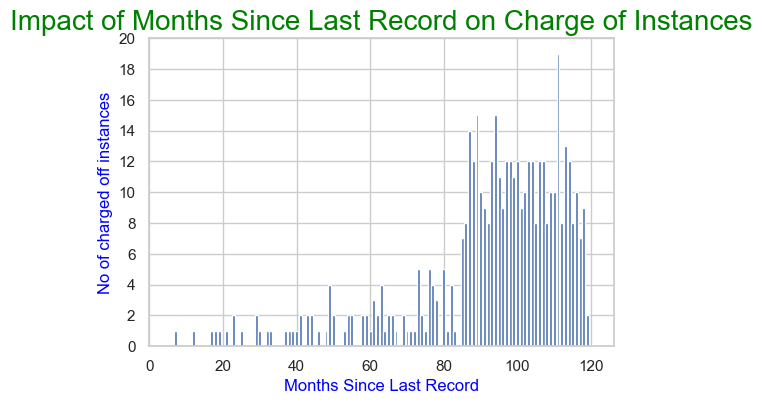

In [244]:
interim_df = filtered_loan_data[(filtered_loan_data["pub_rec"]>=1) & (filtered_loan_data["mths_since_last_record"]>=0)]
df_months_records = pd.pivot_table(data=interim_df, index="mths_since_last_record", columns="loan_status", values="funded_amnt", aggfunc="count", margins=True, margins_name="Total", fill_value=0).reset_index()
df_months_records["mths_since_last_record"] = pd.to_numeric(df_months_records["mths_since_last_record"], errors="coerce")
plt.figure(figsize=(6,4))
font_title = {"fontsize":20, "fontweight":5, "color":"Green"}
font_label = {"fontsize":12, "fontweight":5, "color":"Blue"}
plt.bar(df_months_records["mths_since_last_record"],df_months_records["Charged Off"])
plt.title("Impact of Months Since Last Record on Charge of Instances", fontdict=font_title)
plt.xlabel("Months Since Last Record", fontdict=font_label)
plt.ylabel("No of charged off instances", fontdict=font_label)
plt.yticks(range(0,21,2))
plt.show()

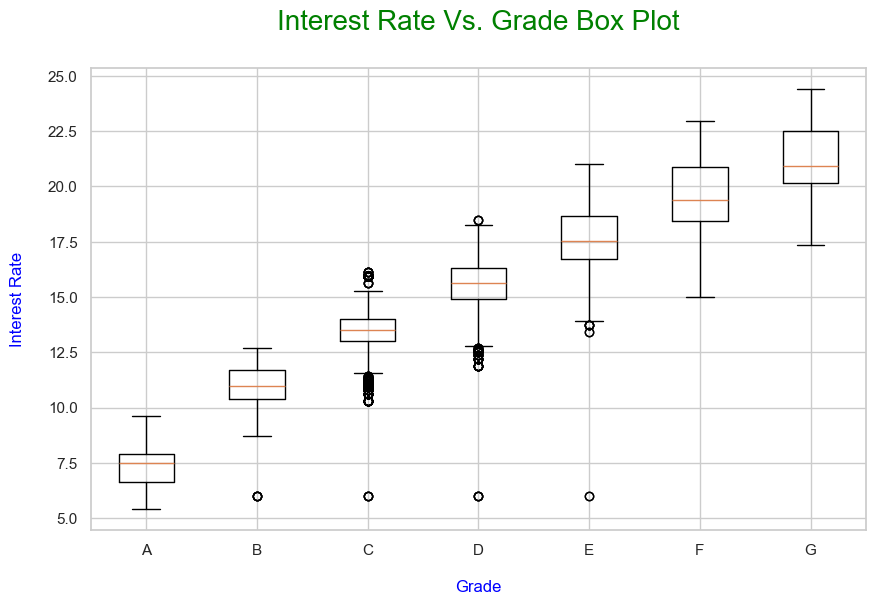

In [245]:
plt.figure(figsize=(10,6))
font_title = {"fontsize":20, "fontweight":5, "color":"Green"}
font_label = {"fontsize":12, "fontweight":5, "color":"Blue"}
plt.boxplot([filtered_loan_data[filtered_loan_data["grade"]=="A"]["int_rate"], filtered_loan_data[filtered_loan_data["grade"]=="B"]["int_rate"], 
             filtered_loan_data[filtered_loan_data["grade"]=="C"]["int_rate"], filtered_loan_data[filtered_loan_data["grade"]=="D"]["int_rate"], 
             filtered_loan_data[filtered_loan_data["grade"]=="E"]["int_rate"], filtered_loan_data[filtered_loan_data["grade"]=="F"]["int_rate"], 
             filtered_loan_data[filtered_loan_data["grade"]=="G"]["int_rate"]])
plt.title("Interest Rate Vs. Grade Box Plot\n", fontdict={"fontsize":20, "fontweight":5, "color":"Green"})
plt.xlabel("\nGrade", fontdict={"fontsize":12, "fontweight":5, "color":"Blue"})
plt.ylabel("Interest Rate\n", fontdict={"fontsize":12, "fontweight":5, "color":"Blue"})
plt.xticks(ticks=[1,2,3,4,5,6,7], labels=["A", "B", "C", "D", "E", "F", "G"])
plt.show()

To further study the impact of this variable, we will find whether the interest rate key statistics are any different for fully paid loans vs. charged off loans across different grades of loans

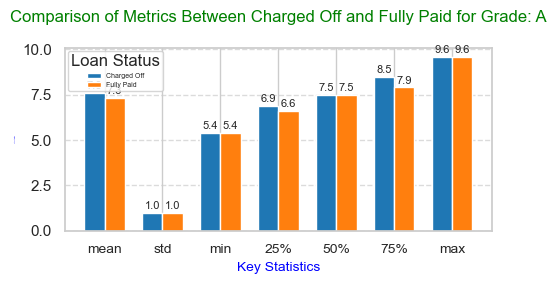

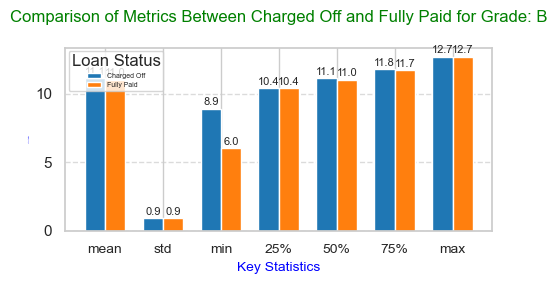

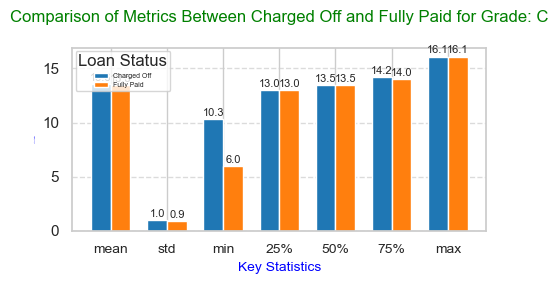

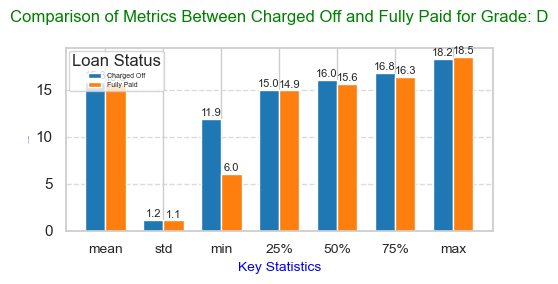

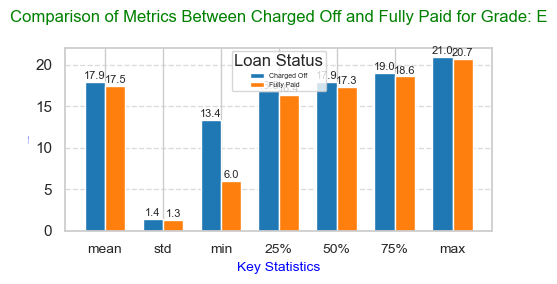

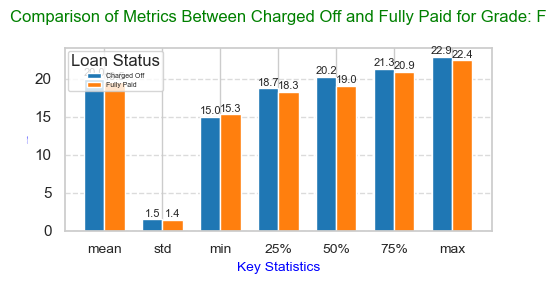

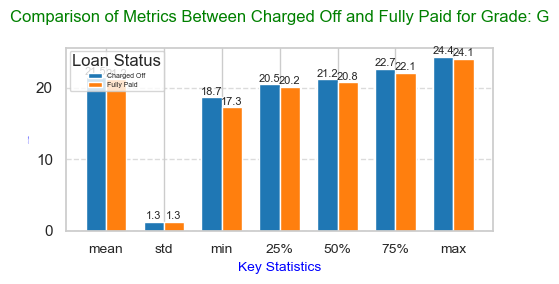

In [250]:
for i in sorted(list(filtered_loan_data["grade"].value_counts().index)):
    data = round(filtered_loan_data[filtered_loan_data["grade"]==i].groupby(by="loan_status")["int_rate"].describe(),1)
    data_without_count = data.drop(columns=["count"])
    attributes = data_without_count.columns
    x = range(len(attributes))
    width = 0.35
    fig, ax = plt.subplots(figsize=(5, 3))
    charged_off_bars = ax.bar(
        [pos-width/2 for pos in x],
        data_without_count.loc["Charged Off"],
        width=width,
        label="Charged Off",
        color="#1f77b4"
    )
    fully_paid_bars = ax.bar(
        [pos + width / 2 for pos in x],
        data_without_count.loc["Fully Paid"],
        width=width,
        label="Fully Paid",
        color="#ff7f0e"
    )

    for bar in charged_off_bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,  
            bar.get_height() + 0.1,  
            f'{bar.get_height():.1f}',  
            ha='center', va='bottom', fontsize=8
        )

    for bar in fully_paid_bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,  
            bar.get_height() + 0.1,  
            f'{bar.get_height():.1f}',  
            ha='center', va='bottom', fontsize=8
        )
    
    ax.set_title(f"Comparison of Metrics Between Charged Off and Fully Paid for Grade: {i}\n", fontsize=12, color="green")
    ax.set_xlabel("Key Statistics", fontsize=10, color="blue")
    ax.set_ylabel("Interest Rate", fontsize=1, color="blue")
    ax.set_xticks(x)
    ax.set_xticklabels(attributes, fontsize=10)
    ax.legend(fontsize=5, title="Loan Status")
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

Purpose Vs. Grades

By doing this analysis we will find that how the purpose of loan and grades have an interplay as well as we will find out how the company is disbursing the loan through Case Count variable. The case count variable tells us how many loans were approved for each Grade for every purpose and we can find some surprising outputs like, a lower grade loan has a higher case count compared to a higher grade loan.

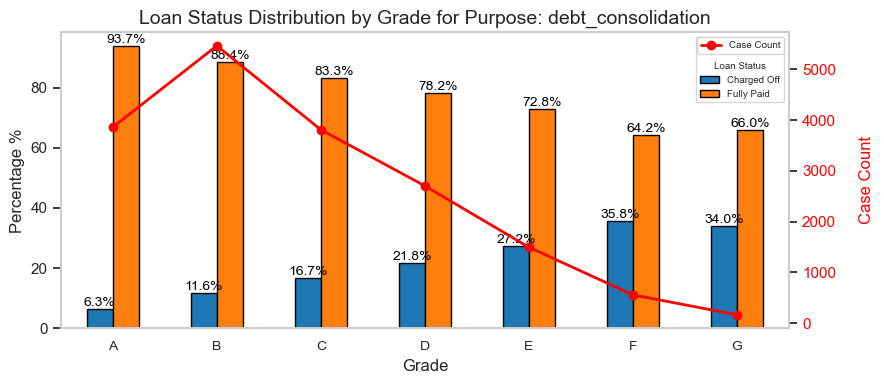

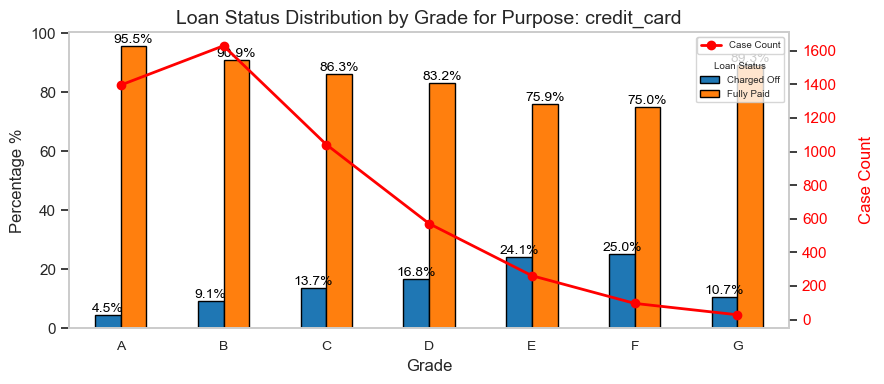

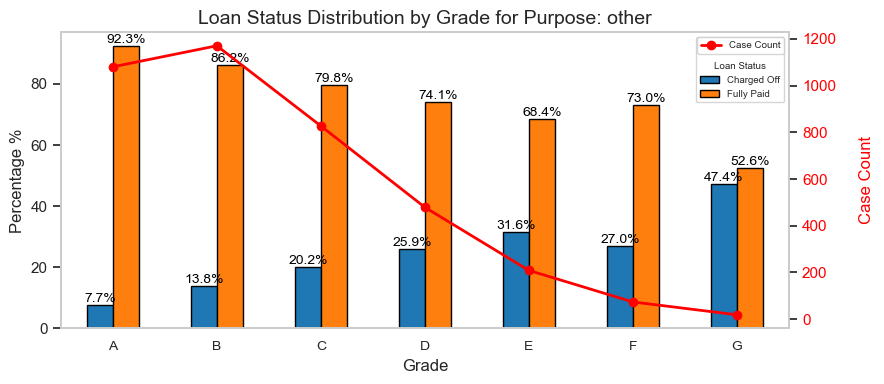

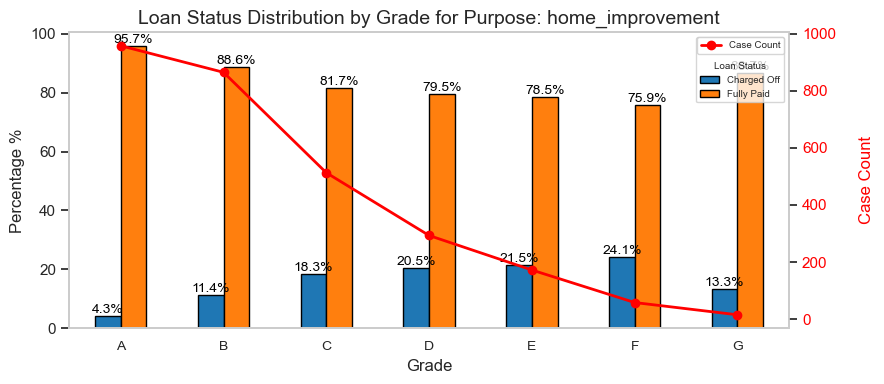

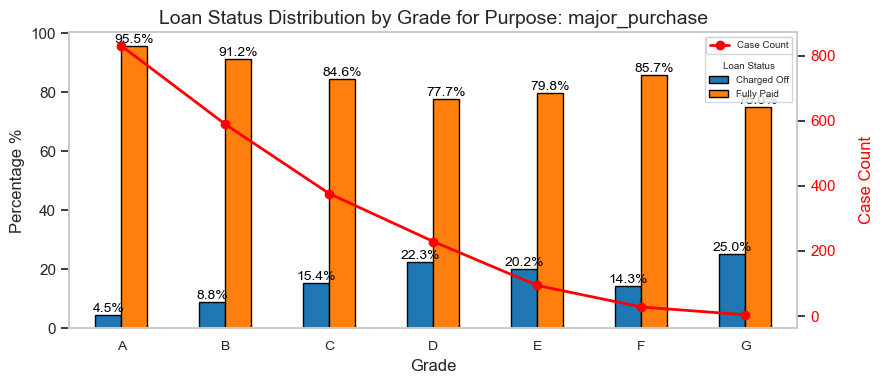

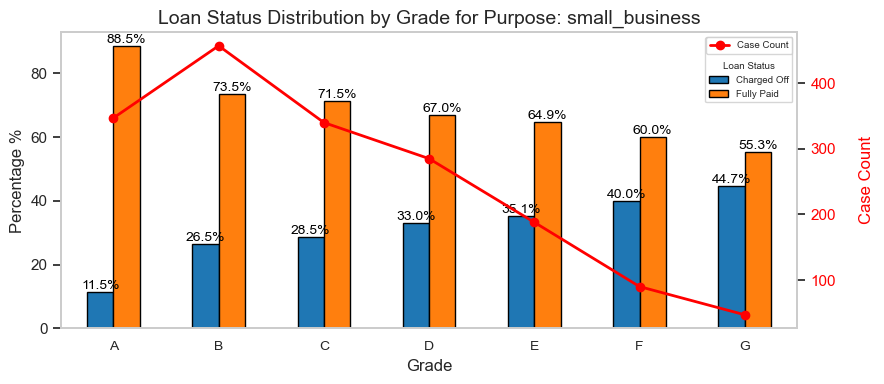

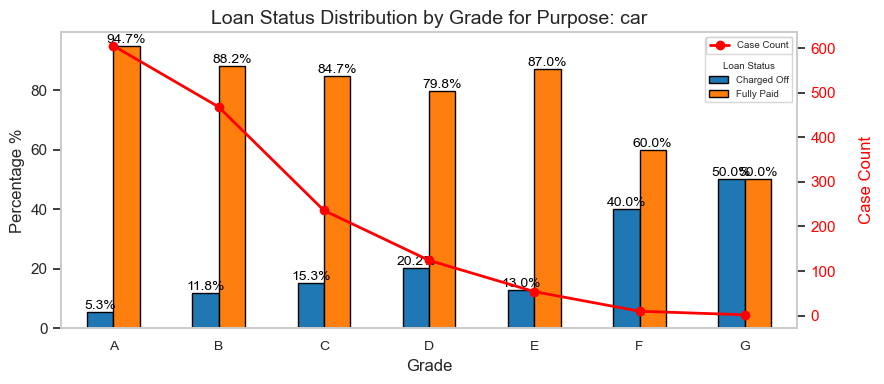

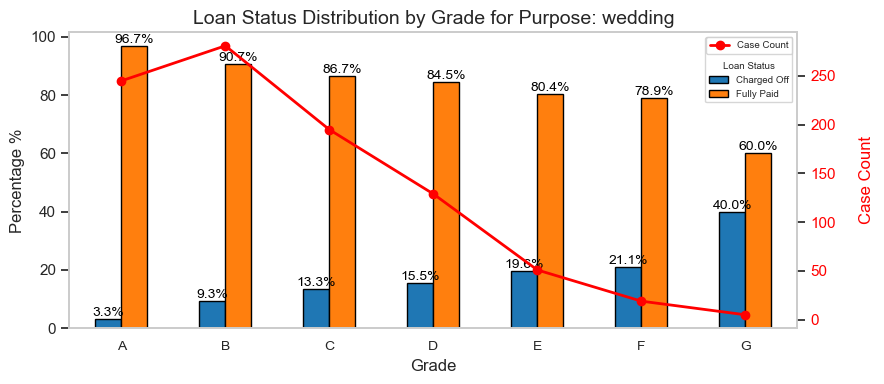

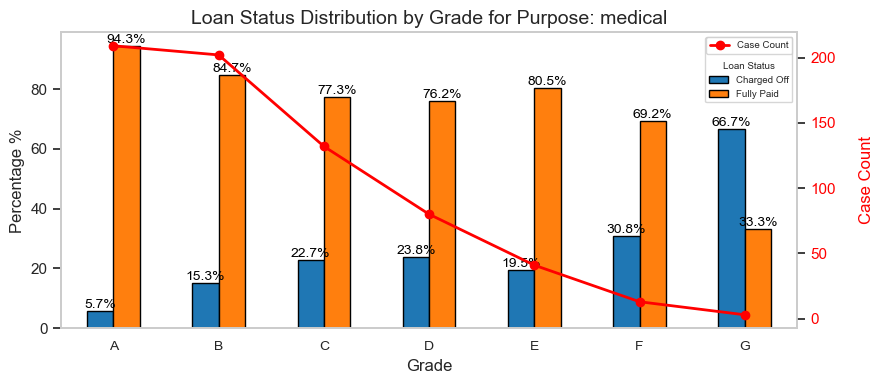

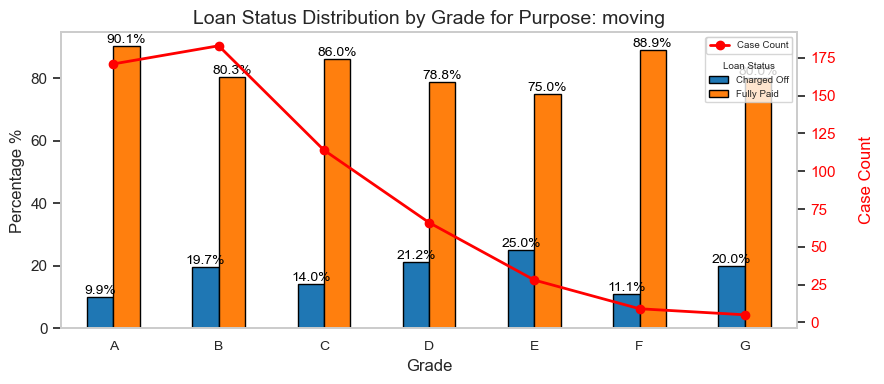

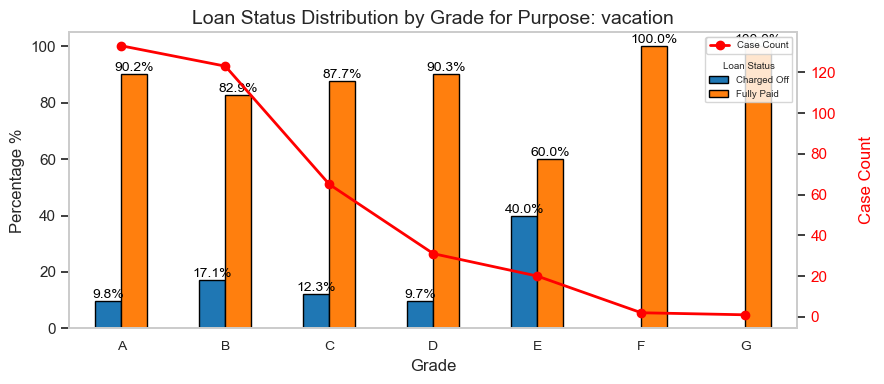

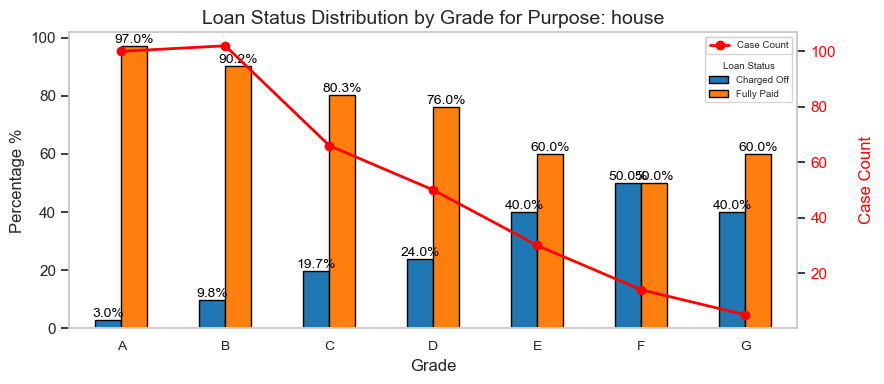

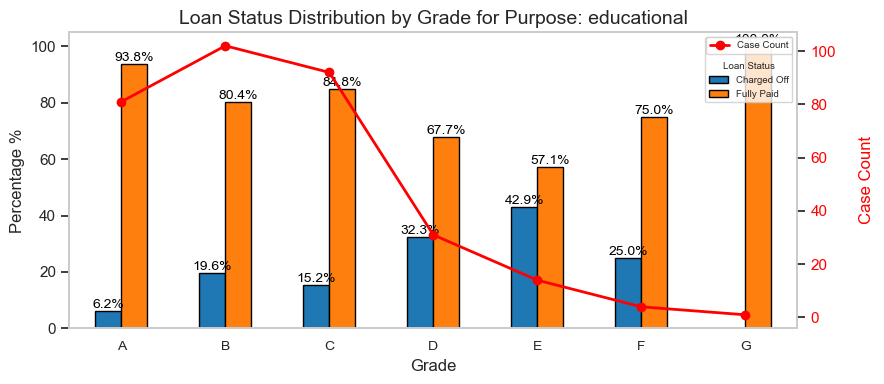

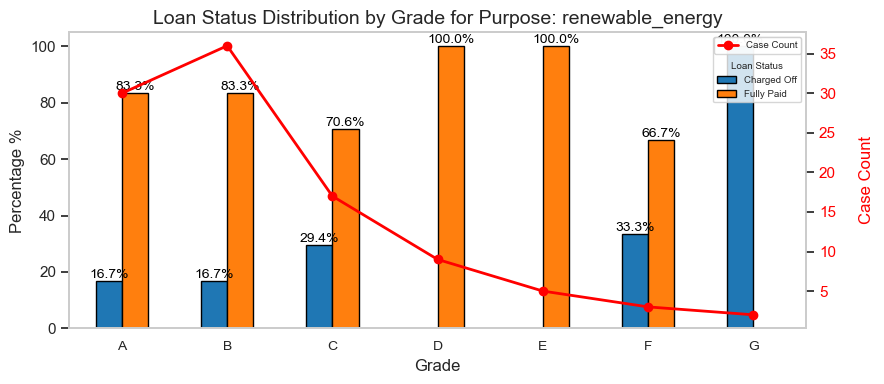

In [277]:
updated_data = pd.DataFrame()
purposes = filtered_loan_data["purpose"].value_counts().index
for purpose in purposes:
    data = round(filtered_loan_data[filtered_loan_data["purpose"]==purpose].groupby(by="grade")["loan_status"].value_counts(normalize=True)*100,1)
    data = data.reset_index(name="percentage")
    data["purpose"] = purpose
    counts = filtered_loan_data[filtered_loan_data["purpose"]==purpose].groupby(by="grade")["loan_status"].count()
    updated_data = pd.concat([updated_data, data], ignore_index=True)
    pivot_data = pd.pivot_table(data=data, index="grade", columns="loan_status", values="percentage", fill_value=0)
    fig, ax1 = plt.subplots(figsize=(9, 4))
    pivot_data.plot(kind="bar", ax=ax1, edgecolor="black", color=["#1f77b4", "#ff7f0e", "#2ca02c"])
    ax1.set_ylabel("Percentage %", fontsize=12)
    ax1.set_title(f"Loan Status Distribution by Grade for Purpose: {purpose}", fontsize=14)
    ax1.set_xlabel("Grade", fontsize=12)
    ax1.set_xticks(range(len(pivot_data.index)))
    ax1.set_xticklabels(pivot_data.index, rotation=0, fontsize=10)
    ax1.legend(loc="upper right", title="\n\nLoan Status", title_fontsize=7, fontsize=7)               
    
    
    # Annotate percentages on the bars
    for container in ax1.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:  # Only annotate non-zero bars
                ax1.text(
                    bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
                    height,  # Y-coordinate (top of the bar)
                    f'{height:.1f}%',  # Percentage with one decimal place
                    ha='center', va='bottom', fontsize=10, color='black'
                )
    
    ax2 = ax1.twinx()
    ax2.plot(counts.index, counts.values, color="red", marker="o", label="Case Count", linewidth=2)
    ax2.set_ylabel("\nCase Count", fontsize=12, color="red")
    ax2.tick_params(axis="y", labelcolor="red")
    ax2.legend(loc="upper right", fontsize=7)

    ax1.grid(False)
    ax2.grid(False)
    plt.tight_layout()
    plt.show()

Public Record Vs. Grade.

We will try to study the dual impact of having public records for different grades od loan

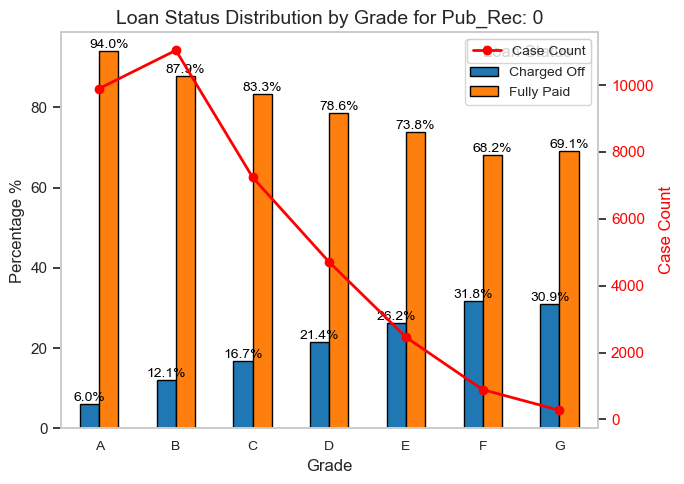

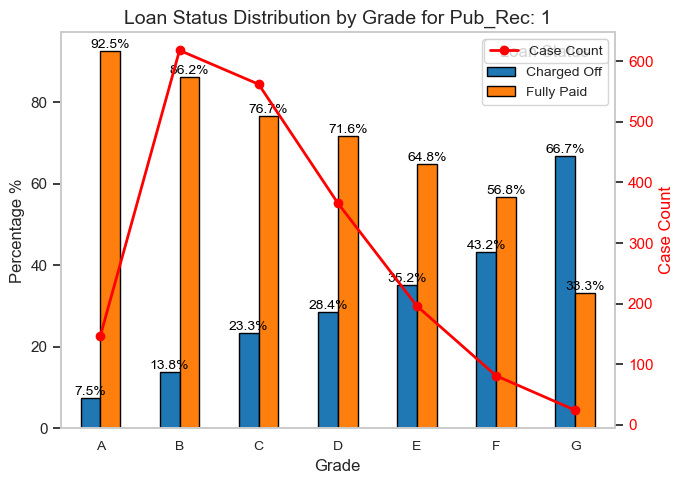

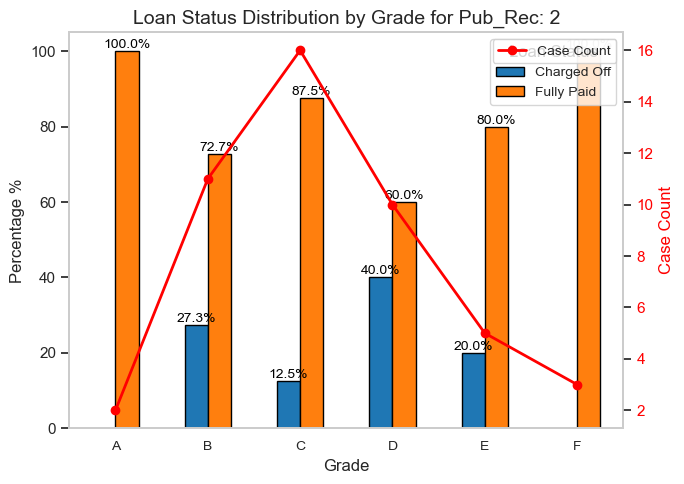

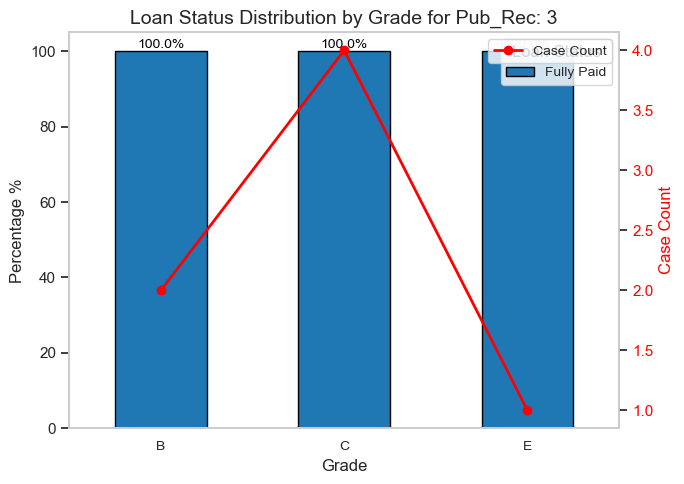

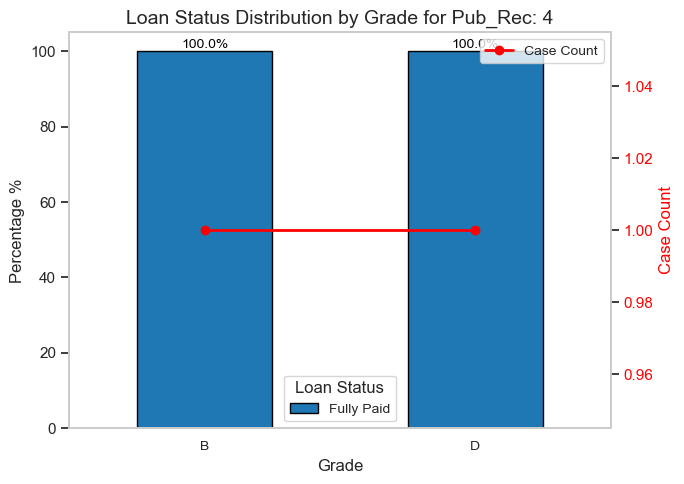

In [280]:
updated_data = pd.DataFrame()
records = filtered_loan_data["pub_rec"].value_counts().index
for record in records:
    data = round(filtered_loan_data[filtered_loan_data["pub_rec"]==record].groupby(by="grade")["loan_status"].value_counts(normalize=True)*100,1)
    data = data.reset_index(name="percentage")
    data["pub_rec"] = record
    counts = filtered_loan_data[filtered_loan_data["pub_rec"] == record].groupby(by="grade")["loan_status"].count()
    updated_data = pd.concat([updated_data, data], ignore_index=True)
    pivot_data = pd.pivot_table(data=data, index="grade", columns="loan_status", values="percentage", fill_value=0)
    fig, ax1 = plt.subplots(figsize=(7, 5))
    pivot_data.plot(kind="bar", ax=ax1, edgecolor="black", color=["#1f77b4", "#ff7f0e", "#2ca02c"])
    ax1.set_ylabel("Percentage %", fontsize=12)
    ax1.set_title(f"Loan Status Distribution by Grade for Pub_Rec: {record}", fontsize=14)
    ax1.set_xlabel("Grade", fontsize=12)
    ax1.set_xticks(range(len(pivot_data.index)))
    ax1.set_xticklabels(pivot_data.index, rotation=0, fontsize=10)
    ax1.legend(title="Loan Status", fontsize=10)

    # Annotate percentages on the bars
    for container in ax1.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:  # Only annotate non-zero bars
                ax1.text(
                    bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
                    height,  # Y-coordinate (top of the bar)
                    f'{height:.1f}%',  # Percentage with one decimal place
                    ha='center', va='bottom', fontsize=10, color='black'
                )
    ax2 = ax1.twinx()
    ax2.plot(counts.index, counts.values, color="red", marker="o", label="Case Count", linewidth=2)
    ax2.set_ylabel("Case Count", fontsize=12, color="red")
    ax2.tick_params(axis="y", labelcolor="red")
    ax2.legend(loc="upper right", fontsize=10)
    ax1.grid(False)
    ax2.grid(False)
    
    plt.tight_layout()
    plt.show()          

We will study the Impact of Sub Grades as well for Public Records

We will add one more column Sub grade number and then cross plot sub grade along with sub grade number to find its impact

In [282]:
filtered_loan_data['sub_grade_number'] = filtered_loan_data['sub_grade'].str.replace('[A-Za-z]', '', regex=True)

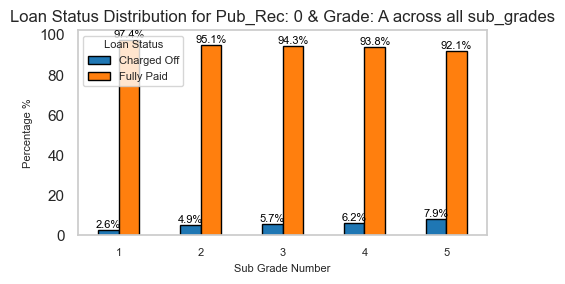

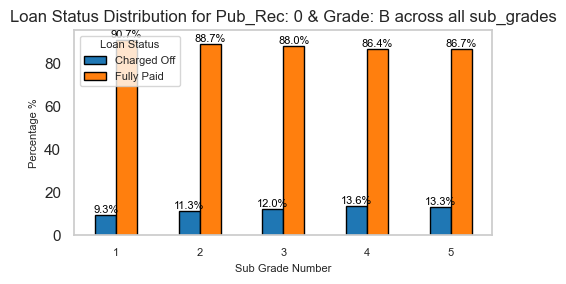

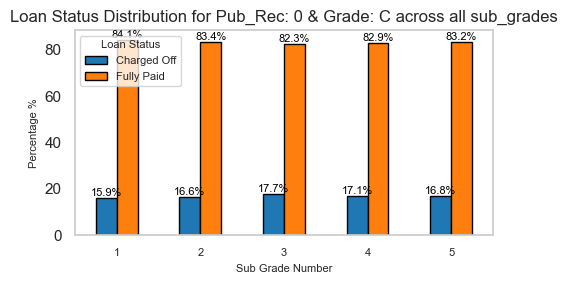

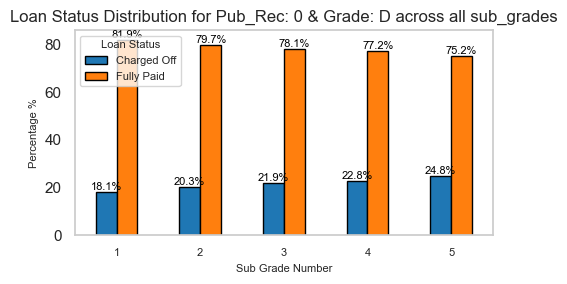

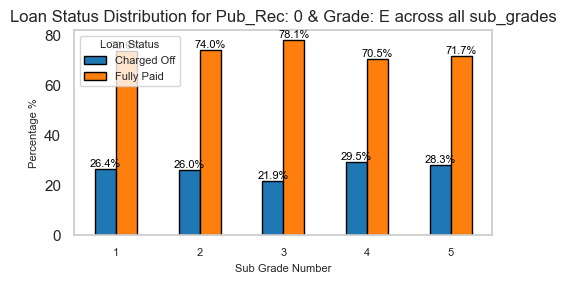

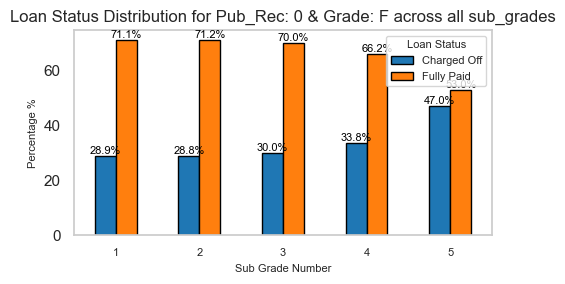

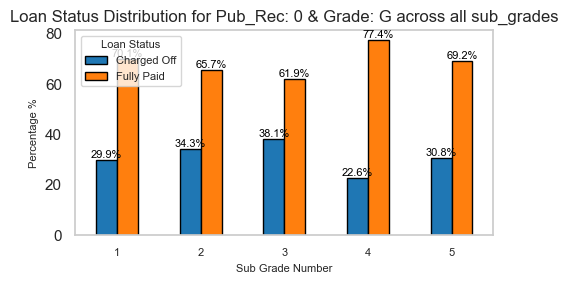

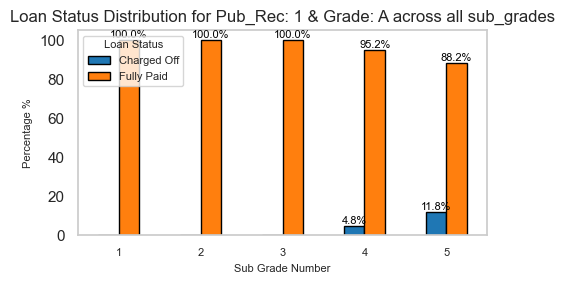

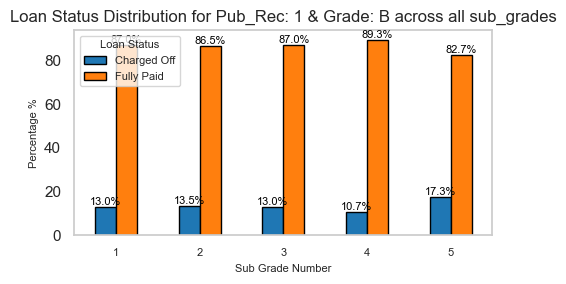

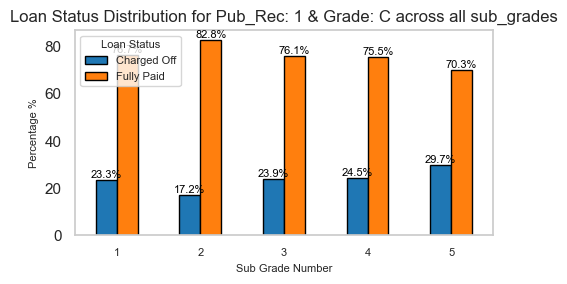

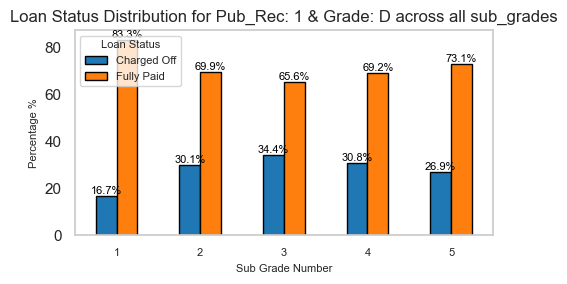

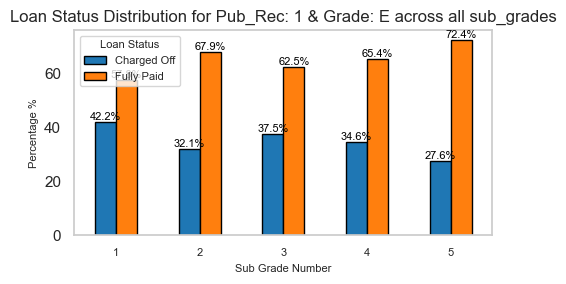

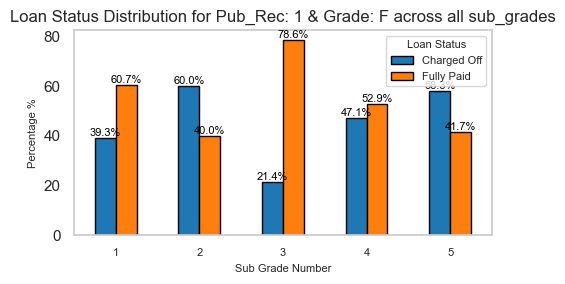

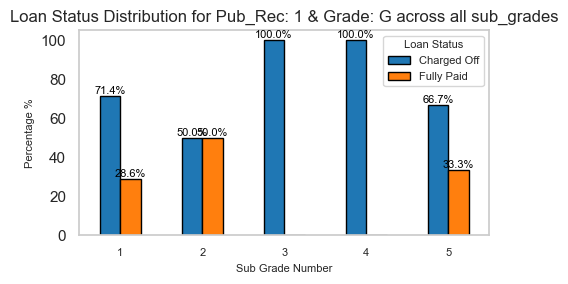

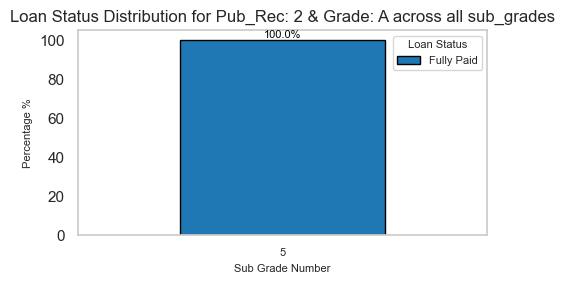

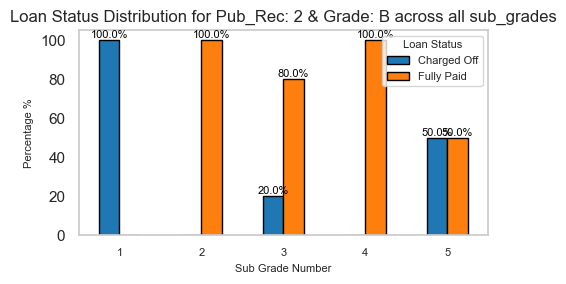

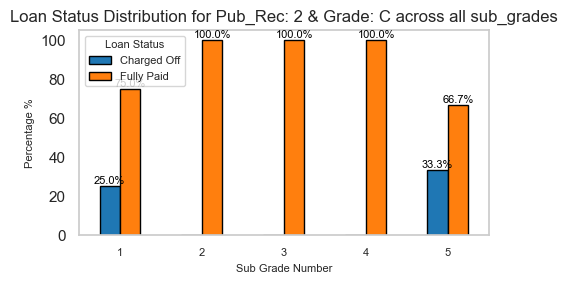

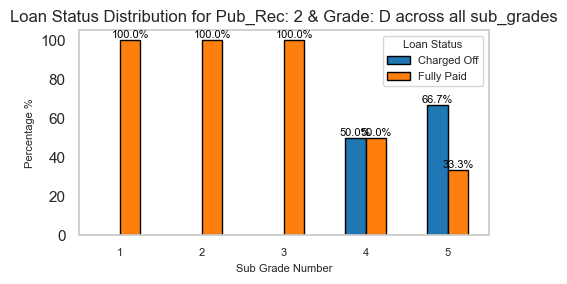

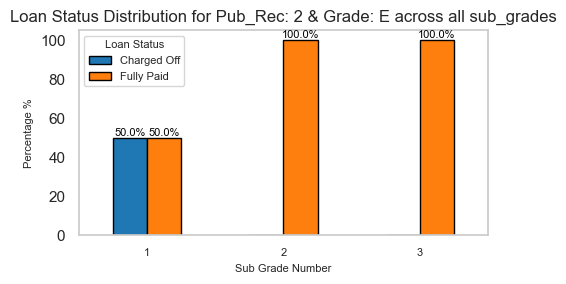

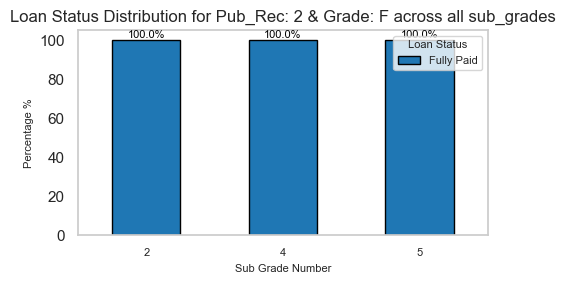

TypeError: no numeric data to plot

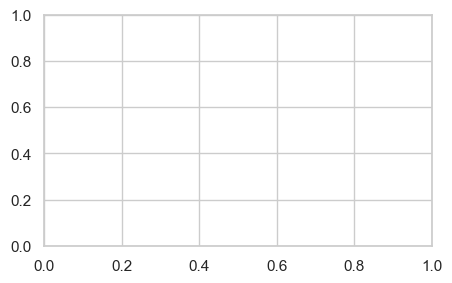

In [286]:
updated_data = pd.DataFrame()
records = filtered_loan_data["pub_rec"].value_counts().index
grade_nos = sorted(list(filtered_loan_data["sub_grade_number"].value_counts().index))
grades = sorted(list(filtered_loan_data["grade"].value_counts().index))
for record in records:
    for i in grades:
        data = round(filtered_loan_data[(filtered_loan_data["pub_rec"]==record) & (filtered_loan_data["grade"]==i)].groupby(by="sub_grade_number")
                     ["loan_status"].value_counts(normalize=True)*100,1)
        data = data.reset_index(name="percentage")
        data["pub_rec"] = record
        updated_data = pd.concat([updated_data, data], ignore_index=True)
        pivot_data = pd.pivot_table(data=data, index="sub_grade_number", columns="loan_status", values="percentage", fill_value=0)
        fig, ax1 = plt.subplots(figsize=(5, 3))
        pivot_data.plot(kind="bar", ax=ax1, edgecolor="black", color=["#1f77b4", "#ff7f0e", "#2ca02c"])
        ax1.set_ylabel("Percentage %", fontsize=8)
        ax1.set_title(f"Loan Status Distribution for Pub_Rec: {record} & Grade: {i} across all sub_grades", fontsize=12)
        ax1.set_xlabel("Sub Grade Number", fontsize=8)
        ax1.set_xticks(range(len(pivot_data.index)))
        ax1.set_xticklabels(pivot_data.index, rotation=0, fontsize=8)
        ax1.legend(title="Loan Status", title_fontsize=8, fontsize=8)
    
        # Annotate percentages on the bars
        for container in ax1.containers:
            for bar in container:
                height = bar.get_height()
                if height > 0:  # Only annotate non-zero bars
                    ax1.text(
                        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
                        height,  # Y-coordinate (top of the bar)
                        f'{height:.1f}%',  # Percentage with one decimal place
                        ha='center', va='bottom', fontsize=8, color='black'
                    )
        ax1.grid(False)
        plt.tight_layout()
        plt.show()     

We will try to find if there is any relation between open accounts and interest rates

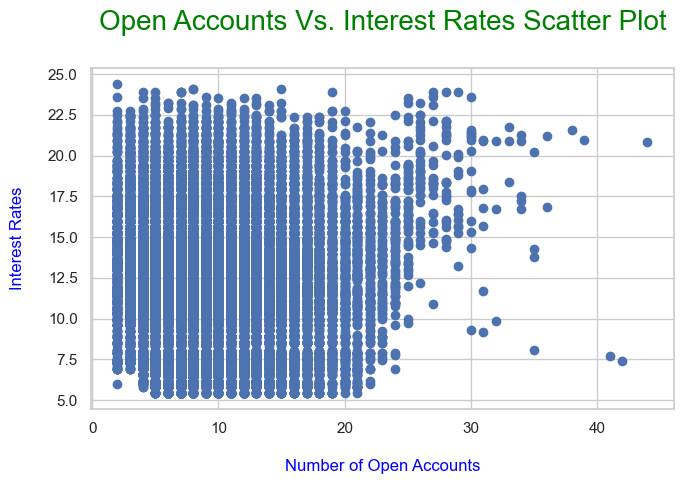

In [287]:
plt.figure(figsize=(7,5))
font_title = {"fontsize":20, "fontweight":5, "color":"Green"}
font_label = {"fontsize":12, "fontweight":5, "color":"Blue"}
plt.scatter(filtered_loan_data["open_acc"], filtered_loan_data["int_rate"])
plt.title("Open Accounts Vs. Interest Rates Scatter Plot\n", fontdict=font_title)
plt.xlabel("\nNumber of Open Accounts", fontdict=font_label)
plt.ylabel("Interest Rates\n", fontdict=font_label)
plt.tight_layout()
plt.show()

We will try to find if there is any relation between revolving balance utilization and interest rates

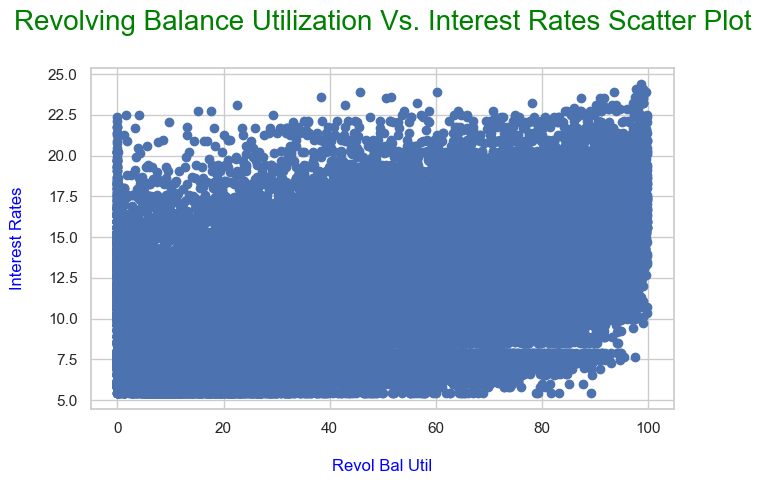

In [288]:
plt.figure(figsize=(7,5))
font_title = {"fontsize":20, "fontweight":5, "color":"Green"}
font_label = {"fontsize":12, "fontweight":5, "color":"Blue"}
plt.scatter(filtered_loan_data["revol_util"], filtered_loan_data["int_rate"])
plt.title("Revolving Balance Utilization Vs. Interest Rates Scatter Plot\n", fontdict=font_title)
plt.xlabel("\nRevol Bal Util", fontdict=font_label)
plt.ylabel("Interest Rates\n", fontdict=font_label)
plt.tight_layout()
plt.show()

Revolving Balance Utilization's impact on the risk needs to be studied

We will add one categorical variable to bucket the revolving balance utilization into 10 quintiles and then we will study the impact

In [295]:
filtered_loan_data["revol_util_cat"] = pd.qcut(filtered_loan_data["revol_util"], q=10, labels=["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"])

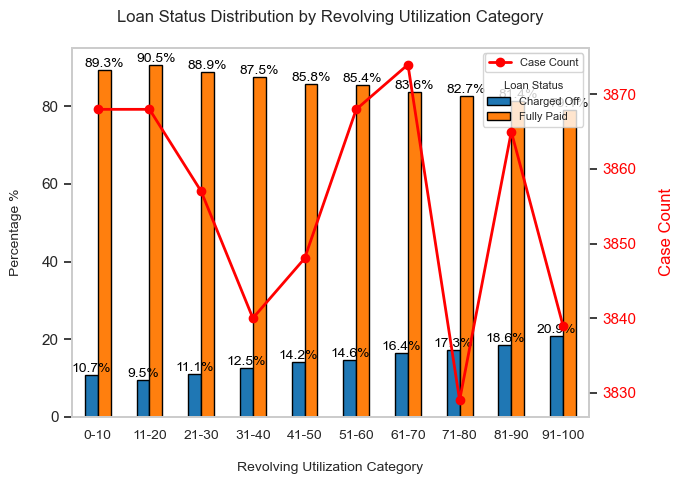

In [300]:
updated_data = pd.DataFrame()
util = sorted(list(filtered_loan_data["revol_util_cat"].value_counts().index))
data = round(filtered_loan_data.groupby(by="revol_util_cat", observed=True)["loan_status"].value_counts(normalize=True)*100,1)
data = data.reset_index(name="percentage")
counts = filtered_loan_data.groupby(by="revol_util_cat", observed=True)["loan_status"].count()
updated_data = pd.concat([updated_data, data], ignore_index=True)
pivot_data = pd.pivot_table(data=data, index="revol_util_cat", columns="loan_status", values="percentage", fill_value=0, observed=True)
fig, ax1 = plt.subplots(figsize=(7, 5))
pivot_data.plot(kind="bar", ax=ax1, edgecolor="black", color=["#1f77b4", "#ff7f0e", "#2ca02c"])
ax1.set_ylabel("Percentage %\n", fontsize=10)
ax1.set_title(f"Loan Status Distribution by Revolving Utilization Category\n", fontsize=12)
ax1.set_xlabel("\nRevolving Utilization Category", fontsize=10)
ax1.set_xticks(range(len(pivot_data.index)))
ax1.set_xticklabels(pivot_data.index, rotation=0, fontsize=10)
ax1.legend(title="\n\nLoan Status", loc="upper right", title_fontsize=8, fontsize=8)               

# Annotate percentages on the bars
for container in ax1.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only annotate non-zero bars
            ax1.text(
                bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
                height,  # Y-coordinate (top of the bar)
                f'{height:.1f}%',  # Percentage with one decimal place
                ha='center', va='bottom', fontsize=10, color='black'
            )

ax2 = ax1.twinx()
ax2.plot(counts.index, counts.values, color="red", marker="o", label="Case Count", linewidth=2)
ax2.set_ylabel("\nCase Count", fontsize=12, color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.legend(loc="upper right", fontsize=8)
ax1.grid(False)
ax2.grid(False)
plt.tight_layout()
plt.show()

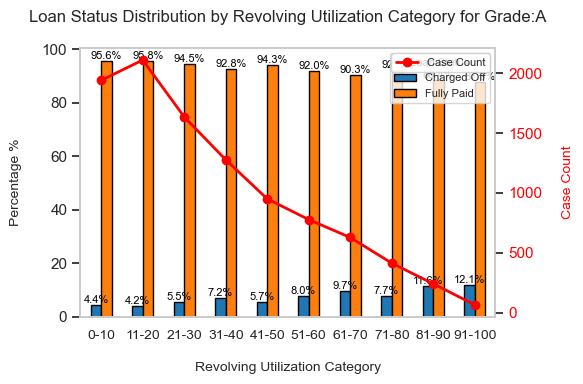

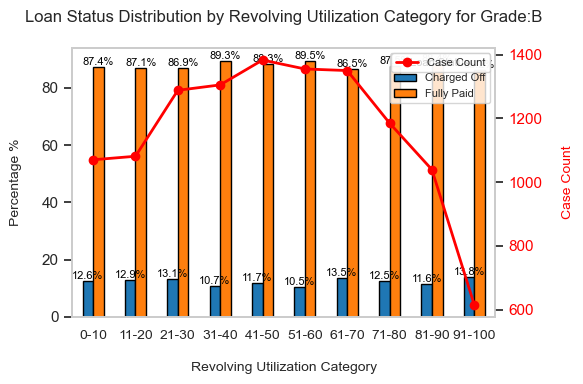

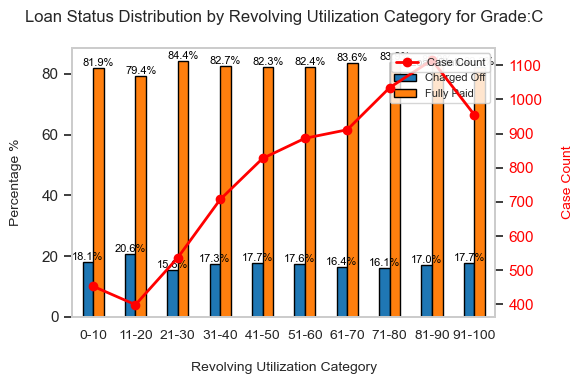

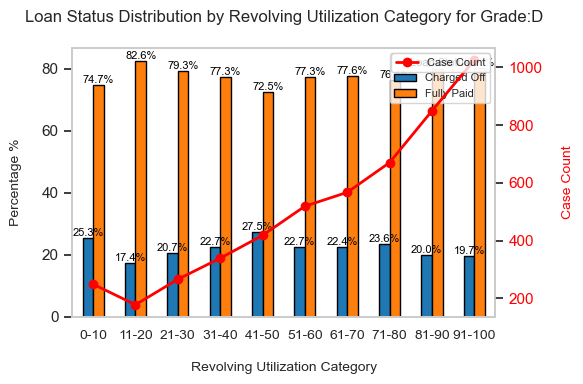

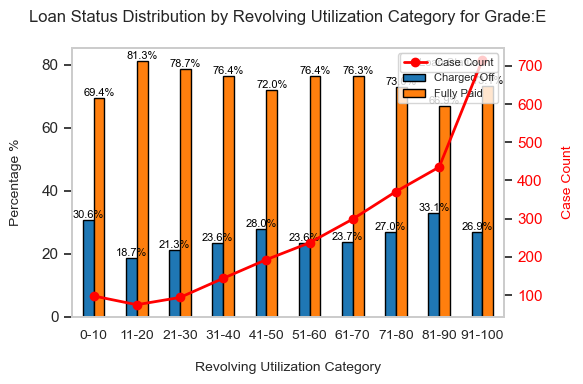

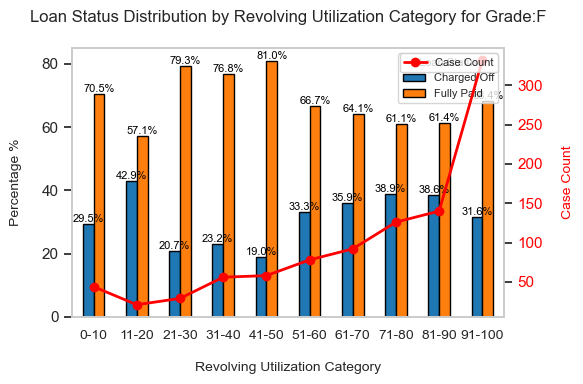

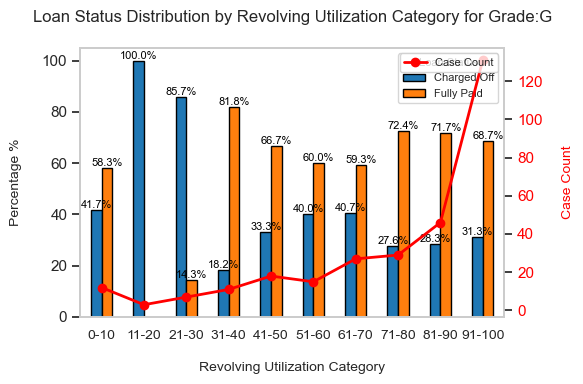

In [304]:
updated_data = pd.DataFrame()
util = sorted(list(filtered_loan_data["revol_util_cat"].value_counts().index))
grades = sorted(list(filtered_loan_data["grade"].value_counts().index))
for i in grades:
    data = round(filtered_loan_data[filtered_loan_data["grade"]==i].groupby(by="revol_util_cat", observed=True)["loan_status"].value_counts(normalize=True)*100,1)
    data = data.reset_index(name="percentage")
    counts = filtered_loan_data[filtered_loan_data["grade"]==i].groupby(by="revol_util_cat", observed=True)["loan_status"].count()
    updated_data = pd.concat([updated_data, data], ignore_index=True)
    pivot_data = pd.pivot_table(data=data, index="revol_util_cat", columns="loan_status", values="percentage", fill_value=0, observed=True)
    fig, ax1 = plt.subplots(figsize=(6, 4))
    pivot_data.plot(kind="bar", ax=ax1, edgecolor="black", color=["#1f77b4", "#ff7f0e", "#2ca02c"])
    ax1.set_ylabel("Percentage %\n", fontsize=10)
    ax1.set_title(f"Loan Status Distribution by Revolving Utilization Category for Grade:{i}\n", fontsize=12)
    ax1.set_xlabel("\nRevolving Utilization Category", fontsize=10)
    ax1.set_xticks(range(len(pivot_data.index)))
    ax1.set_xticklabels(pivot_data.index, rotation=0, fontsize=10)
    ax1.legend(title="Loan Status", loc="upper right", title_fontsize=8, fontsize=8)               
    
    # Annotate percentages on the bars
    for container in ax1.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:  # Only annotate non-zero bars
                ax1.text(
                    bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
                    height,  # Y-coordinate (top of the bar)
                    f'{height:.1f}%',  # Percentage with one decimal place
                    ha='center', va='bottom', fontsize=8, color='black'
                )
    
    ax2 = ax1.twinx()
    ax2.plot(counts.index, counts.values, color="red", marker="o", label="Case Count", linewidth=2)
    ax2.set_ylabel("\nCase Count", fontsize=10, color="red")
    ax2.tick_params(axis="y", labelcolor="red")
    ax2.legend(loc="upper right", fontsize=8)
    ax1.grid(False)
    ax2.grid(False)
    plt.tight_layout()
    plt.show()